# Project 2: Model Prediction of Sale Price

Submission by Alexis Lim

# 1. Executive Summary

When it comes to housing prices, we often have access to extensive past data around housing features and the eventual sale price. Being able to predict future sale prices within a reasonable margin would be incredibly useful to many stakeholders, including housing agents, governing bodies and even residents themselves.

In this project, we process the Ames train and test datasets obtained via the [Kaggle competition](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge) hosted by General Assembly to find a robust model based on 25-30 variables for prediction of house sale price. We look at which features affect sale price the most through data cleaning and exploratory data analysis, and build and refine our model using various regression techniques.

### Table of Contents
- [Train Data Import and Cleaning](#2.Train-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
- [Model Fit and Testing](#4.-Model-Fit-and-Testing)
- [Feature Engineering](#5.-Feature-Engineering)
- [Test Data Processing](#6.-Test-Data-Processing)
- [Model Iteration](#7.-Model-Iteration)
- [Test Data Prediction & Output](#8.-Test-Data-Prediction-&-Output)
- [Conclusion & Recommendations](#9.-Conclusion-&-Recommendations)



### Problem Statement

What features of a house contribute most significantly to its eventual sale price, and with knowledge of these features, how can we predict future sale price? 

We approach this question from the POV of a consultancy in Ames, Iowa, who is interested in an algorithm for housing sale prices that can take in the features in the dataset and return a predicted sale price. This model can then be marketed to both governing bodies and housing agents who would be interested in such a tool.


### Data Description

The data dictionary below lists the variables that are available in this dataset and their definitions, per the [original data documentation](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). The feature names used are the lowercase versions in this notebook.

|Feature|Variable type|Datatype|Description|
|:------|:-------|:-------|:-----|
|id|Discrete|int|Observation number|
|pid|Nominal|int|Parcel identification number|
|ms_subclass|Nominal|int|Identifies the type of dwelling involved in the sale|
|ms_zoning|Nominal|object|Identifies the general zoning classification of the sale|
|lot_frontage|Continuous|float|Linear feet of street connected to property 
|lot_area|Continuous|int|Lot size in square feet|
|street|Nominal|object|Type of road access to property| 
|alley|Nominal|object|Type of alley access to property| 
|lot_shape|Ordinal|object|General shape of property| 
|land_contour|Nominal|object|Flatness of the property| 
|utilities|Ordinal|object|Type of utilities available|
|lot_config|Nominal|object|Lot configuration| 
|land_slope|Ordinal|object|Slope of property| 
|neighborhood|Nominal|object|Physical locations within Ames city limits| 
|condition_1|Nominal|object|Proximity to various conditions|
|condition_2|Nominal|object|Proximity to various conditions (if more than one is present)|
|bldg_type|Nominal|object|Type of dwelling|
|house_style|Nominal|object|Style of dwelling|
|overall_qual|Ordinal|int|Rates the overall material and finish of the house|
|overall_cond|Ordinal|int|Rates the overall condition of the house|
|year_built|Discrete|int|Original construction date|
|year_remod/add|Discrete|int|Remodel date (same as construction date if no remodeling or additions)|
|roof_style|Nominal|object|Type of roof|
|roof_matl|Nominal|object|Roof material|
|exterior_1st|Nominal|object|Exterior covering on house|
|exterior_2nd|Nominal|object|Exterior covering on house (if more than one material)| 
|mas_vnr_type|Nominal|object|Masonry veneer type|
|mas_vnr_area|Continuous|float|Masonry veneer area in square feet| 
|exter_qual|Ordinal|object|Evaluates the quality of the material on the exterior|
|exter_cond|Ordinal|object|Evaluates the present condition of the material on the exterior| 
|foundation|Nominal|object|Type of foundation|
|bsmt_qual|Ordinal|object|Evaluates the height of the basement|
|bsmt_cond|Ordinal|object|Evaluates the general condition of the basement|
|bsmt_exposure|Ordinal|object|Refers to walkout or garden level walls| 
|bsmtfin_type_1|Ordinal|object|Rating of basement finished area|
|bsmtfin_sf_1|Continuous|float|Type 1 finished square feet|
|bsmtfin_type_2|Ordinal|object|Rating of basement finished area (if multiple types)|
|bsmtfin_sf_2|Continuous|float|Type 1 finished square feet| 
|bsmt_unf_sf|Continuous|float|Unfinished square feet of basement area|
|total_bsmt_sf|Continuous|float|Total square feet of basement area|
|heating|Nominal|object|Type of heating|
|heating_qc|Ordinal|object|Heating quality and condition|
|central_air|Nominal|object|Central air conditioning
|electrical|Ordinal|object|Electrical system|
|1st_flr_sf|Continuous|int|First Floor square feet|
|2nd_flr_sf|Continuous|int|Second floor square feet|
|low_qual_fin_sf|Continuous|int|Low quality finished square feet (all floors)|
|gr_liv_area|Continuous|int|Above grade (ground) living area square feet 
|bsmt_full_bath|Discrete|float|Basement full bathrooms|   
|bsmt_half_bath|Discrete|float|Basement half bathrooms| 
|full_bath|Discrete|int|Full bathrooms above grade| 
|half_bath|Discrete|int|Half baths above grade| 
|bedroom_abvgr|Discrete|int|Bedrooms above grade (does NOT include basement bedrooms)|     
|kitchen_abvgr|Discrete|int|Kitchens above grade| 
|kitchen_qual|Ordinal|object|Kitchen quality|
|totrms_abvgrd|Discrete|int|Total rooms above grade (does not include bathrooms)|
|functional|Ordinal|object|Home functionality (Assume typical unless deductions are warranted)|     
|fireplaces|Discrete|int|Number of fireplaces| 
|fireplace_qu|Ordinal|object|Fireplace quality| 
|garage_type|Nominal|object|Garage location| 
|garage_yr_blt|Discrete|float|Year garage was built|          
|garage_finish|Ordinal|object|Interior finish of the garage|
|garage_cars|Discrete|float|Size of garage in car capacity|
|garage_area|Continuous|float|Size of garage in square feet|
|garage_qual|Ordinal|object|Garage quality|     
|garage_cond|Ordinal|object|Garage condition| 
|paved_drive|Ordinal|object|Paved driveway|
|wood_deck_sf|Continuous|int|Wood deck area in square feet|
|open_porch_sf|Continuous|int|Open porch area in square feet|     
|enclosed_porch|Continuous|int|Enclosed porch area in square feet|
|3ssn_porch|Continuous|int|Three season porch area in square feet|
|screen_porch|Continuous|int|Screen porch area in square feet|
|pool_area|Continuous|int|Pool area in square feet|
|pool_qc|Ordinal|object|Pool quality|
|fence|Ordinal|object|Fence quality| 
|misc_feature|Nominal|object|Miscellaneous feature not covered in other categories|
|misc_val|Continuous|int|$Value of miscellaneous feature|
|mo_sold|Discrete|int|Month Sold (MM)| 
|yr_sold|Discrete|int|Year Sold (YYYY)|
|sale_type|Nominal|object|Type of sale|     
|saleprice|Continuous|int|Sale price $$|

### Import python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import re

In [2]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE

# 2. Train Data Import and Cleaning

## Comparing training and test datasets


A quick check of the train and test datasets indicates that there are a total of 80 independent variables represented in both datasets, while the train dataset also contains the target variable of sale price. We have 2051 entries in the training data and 879 entries in the train dataset (around 40% of our training data).

In [3]:
#Read in our two datasets.
df = pd.read_csv('../datasets/train.csv')
test_data = pd.read_csv('../datasets/test.csv')

In [4]:
print(f"Training dataset rows and columns: {df.shape}")
print(f"Test dataset rows and columns: {test_data.shape}")

Training dataset rows and columns: (2051, 81)
Test dataset rows and columns: (879, 80)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

Both our training and test datasets have columns with null values, which we will have to fill in if we wish to include the respective columns inside our model.

We will first process and clean the training dataset and proceed with the same transformations for the test data set.

### Processing our training dataset
To facilitate data processing, we will rename the columns in the training dataset.

In [7]:
df.columns = [x.lower().replace(' ','_') for x in df.columns] #Change variables to lowercase and 
                                                              #replace spaces with underscores.

In [8]:
df.columns #Return all columns.

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

We have a lot of variables to consider for our model, which can be grouped in a few ways:

- Variable type (e.g. Nominal, Ordinal, Discrete, Continuous)
- Variable subject (e.g. Garage, Time, Kitchen etc.)
- Variable measure (e.g. condition and quality)

Variable type is a good way to group them since the transformations needed will be similar. To track this in our project, we'll read in a file that records the variable type of each column, based on information taken from the data documentation:

![variableinfo](Var_Info.png)

In [10]:
var_type = pd.read_csv('../datasets/variable_info.csv') #Read in our file.
var_type['variable'] = var_type['variable'].str.lower().str.replace(' ','_') #Rename columns to lowercase 
                                                                #and add underscore to standardise with df.
var_type.head() #View first five rows of our var_type dataframe.

variable        type
0            id  Identifier
1           pid  Identifier
2   ms_subclass     Nominal
3     ms_zoning     Nominal
4  lot_frontage  Continuous

As we are making transformations on our dataset, we want to be able to track for each variable:

- Variable type
- The number of null values that each column has (to be updated)
- Whether we want to use it in our model (to be updated)

To do this, we can create a function that updates and returns a dataframe.

In [11]:
#Function to identify the variable type from our csv file.
def find_type(variable):
    for x,value in enumerate(var_type['variable'].to_list()):
        if value == variable:
            return var_type.loc[x,'type']

In [12]:
#Function to create a dataframe of variable type, dtype and null values based on our df variables
def display_var_info(dataframe):
    info = pd.DataFrame(df.columns.tolist(),columns=['variable'])
    info['dtypes'] = info['variable'].map(lambda x: df[x].dtype)
    info['isnull'] = info['variable'].map(lambda x: df[x].isnull().sum())
    info['type'] = info['variable'].map(find_type)
    for i,x in enumerate(info['variable']):
        if x in nominal_selected + ordinal_selected + discrete_selected + continuous_selected + new_selected:
            info.loc[i,'status'] = 'Selected'
        elif x in transformation_variables:
            info.loc[i,'status'] = 'Transform'
        else:
            info.loc[i,'status'] = 'Not In Use'
    return info

In [13]:
#Create empty lists to track our selected variables.
nominal_selected = [] 
ordinal_selected = []
discrete_selected = []
continuous_selected = []
new_selected = [] #Variables created via feature engineering
transformation_variables = [] #Variables used in creating new features

In [14]:
df_info = display_var_info(df)

In [15]:
df_info

variable   dtypes  isnull        type      status
0             id    int64       0  Identifier  Not In Use
1            pid    int64       0  Identifier  Not In Use
2    ms_subclass    int64       0     Nominal  Not In Use
3      ms_zoning   object       0     Nominal  Not In Use
4   lot_frontage  float64     330  Continuous  Not In Use
..           ...      ...     ...         ...         ...
76      misc_val    int64       0  Continuous  Not In Use
77       mo_sold    int64       0    Discrete  Not In Use
78       yr_sold    int64       0    Discrete  Not In Use
79     sale_type   object       0     Nominal  Not In Use
80     saleprice    int64       0  Continuous  Not In Use

[81 rows x 5 columns]

In [16]:
df_info['type'].value_counts()

Ordinal       23
Nominal       22
Continuous    20
Discrete      14
Identifier     2
Name: type, dtype: int64

The value counts of each type of variable correspond to the data documentation. Comparing the variable type to the pandas dtypes, we can see that most of the Ordinal variables have been read in as object datatypes and will need to be renamed accordingly.

Additionally, MS Subclass has been read in as an integer although it is a nominal variable, so we will need to convert the datatype.

In [17]:
df['ms_subclass'] = df['ms_subclass'].astype('str')
#Update our df_info. 
df_info = display_var_info(df)

In [18]:
df_info.head()

variable   dtypes  isnull        type      status
0            id    int64       0  Identifier  Not In Use
1           pid    int64       0  Identifier  Not In Use
2   ms_subclass   object       0     Nominal  Not In Use
3     ms_zoning   object       0     Nominal  Not In Use
4  lot_frontage  float64     330  Continuous  Not In Use

## Identifying and fixing missing values

Let us first process our null values so we can understand our data better and proceed to feature engineering. We will do this by type category to facilitate our transformations.

### _Nominal Variables_

There are four nominal categories with null values.

In [19]:
#Display info for our nominal variables.
df_info.loc[(df_info['type'] == 'Nominal') & (df_info['isnull'] > 0),:].sort_values(by='isnull',ascending=False)

variable  dtypes  isnull     type      status
75  misc_feature  object    1986  Nominal  Not In Use
7          alley  object    1911  Nominal  Not In Use
59   garage_type  object     113  Nominal  Not In Use
26  mas_vnr_type  object      22  Nominal  Not In Use

Taking a closer look at the data dictionary, the NA values for misc_feature,alley, garage_type and mas_vnr_type are likely to be from a None or Not Applicable category rather than being actual empty or missing data. Let's check these values.

In [20]:
nominal = df_info.loc[df_info['type'] == 'Nominal','variable'].tolist() #Create a list of nominal variable names
for x in nominal: #Print value counts for all nominal variables with null values
    if df[x].isnull().sum() > 0:
        print (df[x].value_counts(), '\n')

Grvl    85
Pave    55
Name: alley, dtype: int64 

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64 

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64 

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: misc_feature, dtype: int64 



Except Masonry Veneer Type, the null values appear to correspond to a None / Not Applicable category that we can see from the data documentation. We may not use the Masonry Veneer Type variable, so let's leave the null values in the column for now and fill in the values for the other columns.

In [21]:
df[['misc_feature','alley','garage_type']] = df[['misc_feature','alley','garage_type']].fillna(value='NA')

In [22]:
#Update our df_info
df_info = display_var_info(df)
df_info.loc[(df_info['type'] == 'Nominal')& (df_info['isnull'] > 0),:].sort_values(by='isnull',ascending=False)

variable  dtypes  isnull     type      status
26  mas_vnr_type  object      22  Nominal  Not In Use

### _Ordinal Variables_

There are eleven ordinal categories with null values.

In [23]:
#Display info for our ordinal variables.
df_info.loc[(df_info['type'] == 'Ordinal') & (df_info['isnull'] > 0),:].sort_values(by='isnull',ascending=False)

variable  dtypes  isnull     type      status
73         pool_qc  object    2042  Ordinal  Not In Use
74           fence  object    1651  Ordinal  Not In Use
58    fireplace_qu  object    1000  Ordinal  Not In Use
61   garage_finish  object     114  Ordinal  Not In Use
64     garage_qual  object     114  Ordinal  Not In Use
65     garage_cond  object     114  Ordinal  Not In Use
33   bsmt_exposure  object      58  Ordinal  Not In Use
36  bsmtfin_type_2  object      56  Ordinal  Not In Use
31       bsmt_qual  object      55  Ordinal  Not In Use
32       bsmt_cond  object      55  Ordinal  Not In Use
34  bsmtfin_type_1  object      55  Ordinal  Not In Use

Similar to the nominal variables, a check of the value counts indicates that many of the null values for these variables are actually Not Applicable values and should be qualified as such. Hence, we can proceed to fill in these values. 

In [24]:
ordinal = df_info.loc[df_info['type'] == 'Ordinal','variable'].tolist() #Create a list of ordinal variable names
for x in ordinal: #Print value counts for all ordinal variables with null values
    if df[x].isnull().sum() > 0:
        print (df[x].value_counts(), '\n')

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64 

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64 

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64 

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64 

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64 

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: fireplace_qu, dtype: int64 

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64 

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64 

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64 

Gd    4
TA    2
Fa    2
Ex    1
Name: pool_qc, dtype: int64 

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64 



In [25]:
df[ordinal] = df[ordinal].fillna(value='NA') #Fill in NA for ordinal null values
df_info = display_var_info(df) #Refresh df_info dataframe
df_info.loc[(df_info['type'] == 'Ordinal') & (df_info['isnull'] > 0),:].sort_values(by='isnull',ascending=False) #Check for remaining null values

Empty DataFrame
Columns: [variable, dtypes, isnull, type, status]
Index: []

### _Discrete Variables_

There are four discrete categories with null values.

In [26]:
#Display info for our discrete variables.
df_info.loc[(df_info['type'] == 'Discrete') & (df_info['isnull'] > 0),:].sort_values(by='isnull',ascending=False)

variable   dtypes  isnull      type      status
60   garage_yr_blt  float64     114  Discrete  Not In Use
48  bsmt_full_bath  float64       2  Discrete  Not In Use
49  bsmt_half_bath  float64       2  Discrete  Not In Use
62     garage_cars  float64       1  Discrete  Not In Use

In [27]:
#Display rows with NA values for bsmt_full_bath/bsmt_half_bath.
df.loc[df['bsmt_full_bath'].isnull(),:][['bsmt_full_bath','bsmt_half_bath','bsmt_qual']].head()

bsmt_full_bath  bsmt_half_bath bsmt_qual
616              NaN             NaN        NA
1327             NaN             NaN        NA

In [28]:
#Display rows with 'NA' for bsmt_qual.
df.loc[df['bsmt_qual'] == 'NA',:][['bsmt_full_bath','bsmt_half_bath','bsmt_qual']].head()

bsmt_full_bath  bsmt_half_bath bsmt_qual
12              0.0             0.0        NA
93              0.0             0.0        NA
114             0.0             0.0        NA
146             0.0             0.0        NA
183             0.0             0.0        NA

From the above, we can see that rows with NA under bsmt_qual (indicating that there is no basement) usually have 0 for the two columns for basement bathrooms.

In [29]:
#Display rows with null values for garage cars.
df.loc[df['garage_cars'].isnull(),:][['garage_cars','garage_qual']].head()

garage_cars garage_qual
1712          NaN          NA

In [30]:
#Check 
df.loc[df['garage_qual'] == 'NA',:][['garage_cars','garage_qual']].head()

garage_cars garage_qual
28           0.0          NA
53           0.0          NA
65           0.0          NA
79           0.0          NA
101          0.0          NA

Similarly, rows with NA under garage_qual (indicating that there is no garage) usually have 0 for the garage car column. We can infer the values and fill the null values in these three rows and columns with 0.0.

In [31]:
df[['bsmt_full_bath','bsmt_half_bath','garage_cars']] = df[['bsmt_full_bath','bsmt_half_bath','garage_cars']].fillna(value=0)

In [32]:
df.loc[df['garage_yr_blt'].isnull(),:][['garage_yr_blt','garage_qual']].head()

garage_yr_blt garage_qual
28             NaN          NA
53             NaN          NA
65             NaN          NA
79             NaN          NA
101            NaN          NA

In [33]:
df.loc[df['garage_qual'].isnull(),:][['garage_yr_blt','garage_qual']].head()

Empty DataFrame
Columns: [garage_yr_blt, garage_qual]
Index: []

For garage_yr_blt, the values are null because there is no garage, but there is no standard number that is used in the existing dataset. Given that there are quite a few null values (>100), we won't want to drop the rows either. At this stage, since we have not decided to use the variable, we can keep the null values in the dataset for now.

In [34]:
df_info = display_var_info(df) #Refresh df_info
df_info.loc[(df_info['type'] == 'Discrete') & (df_info['isnull'] > 0),:].sort_values(by='isnull',ascending=False) #Check remaining discrete columns with null values

variable   dtypes  isnull      type      status
60  garage_yr_blt  float64     114  Discrete  Not In Use

### _Continuous Variables_

There are seven continuous categories with null values.

In [35]:
#Display info for our continuous variables.
df_info.loc[(df_info['type'] == 'Continuous') & (df_info['isnull'] > 0),:].sort_values(by='isnull',ascending=False)

variable   dtypes  isnull        type      status
4    lot_frontage  float64     330  Continuous  Not In Use
27   mas_vnr_area  float64      22  Continuous  Not In Use
35   bsmtfin_sf_1  float64       1  Continuous  Not In Use
37   bsmtfin_sf_2  float64       1  Continuous  Not In Use
38    bsmt_unf_sf  float64       1  Continuous  Not In Use
39  total_bsmt_sf  float64       1  Continuous  Not In Use
63    garage_area  float64       1  Continuous  Not In Use

At first glance, it appears that the lot_frontage null values could indicate a 0 value. However, since the street variable (indicating type of street access) has no null values, we can infer that all of the properties should have a lot_frontage (Linear feet of street connected to property) value.`

In [36]:
df.loc[df['lot_frontage'] == 0,:].head()

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_frontage, lot_area, street, alley, lot_shape, land_contour, utilities, lot_config, land_slope, neighborhood, condition_1, condition_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod/add, roof_style, roof_matl, exterior_1st, exterior_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1, bsmtfin_sf_1, bsmtfin_type_2, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abvgr, kitchen_abvgr, kitchen_qual, totrms_abvgrd, functional, fireplaces, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garage_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, saleprice]
Index: []

[0 rows x 81 columns]

In [37]:
df['street'].isnull().sum()

0

To fill in the values, we have to rely on other variables and need to check which variable has the highest correlation with lot_frontage.

In [38]:
df.dropna().corr()['lot_frontage'].sort_values(ascending=False).head(10)

lot_frontage     1.000000
lot_area         0.575790
1st_flr_sf       0.461396
garage_area      0.383416
gr_liv_area      0.379988
totrms_abvgrd    0.367159
total_bsmt_sf    0.355897
saleprice        0.337743
garage_cars      0.311266
fireplaces       0.246625
Name: lot_frontage, dtype: float64

Based on the other variables, lot_frontage sees the highest correlation with lot_area. A quick comparison of the Pearson correlation score indicates that adding/multiplying with 1st_flr_sf, the next variable with the highest correlation, does not improve the correlation score significantly, so we'll just rely on a simple linear regression with lot_area to impute our values.

In [39]:
#Define our train dataset as all lot_area values where lot_frontage is not null, 
#and test dataset X as all lot_area values where lot_frontage is null.
X_lot_train = df[df['lot_frontage'].notnull()][['lot_area']]
y_lot_train = df[df['lot_frontage'].notnull()][['lot_frontage']]
X_lot_test = df[df['lot_frontage'].isnull()][['lot_area']]


lot_lr = LinearRegression()
lot_lr.fit(X_lot_train,y_lot_train)
lot_frontage_preds = lot_lr.predict(X_lot_test)

In [40]:
df.loc[df['lot_frontage'].isnull(),'lot_frontage'] = lot_frontage_preds

For the basement and garage variables, they are due to the lack of a garage or basement, which in the dataset is usually represented by 0, so we'll impute the null values with 0.

In [41]:
df.loc[df['bsmtfin_sf_1'].isnull(),:][['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_qual']]

bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf bsmt_qual
1327           NaN           NaN          NaN            NaN        NA

In [42]:
df.loc[df['bsmt_qual'] == 'NA',:][['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_qual']].head()

bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf bsmt_qual
12            0.0           0.0          0.0            0.0        NA
93            0.0           0.0          0.0            0.0        NA
114           0.0           0.0          0.0            0.0        NA
146           0.0           0.0          0.0            0.0        NA
183           0.0           0.0          0.0            0.0        NA

In [43]:
df.loc[df['garage_area'].isnull(),:][['garage_area','garage_qual']]

garage_area garage_qual
1712          NaN          NA

In [44]:
df.loc[df['garage_qual'] == 'NA',:][['garage_area','garage_qual']].head()

garage_area garage_qual
28           0.0          NA
53           0.0          NA
65           0.0          NA
79           0.0          NA
101          0.0          NA

In [45]:
df[['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','garage_area']] = df[['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','garage_area']].fillna(value=0)

Similarly to masonry veneer type, the area null values are not 0 values but missing information. A check of the correlation values for this variable indicates that it is positively correlated to saleprice by more than 0.5. Hence, we'll likely want to include this variable in our model. 

In [46]:
df.loc[df['mas_vnr_area'] == 0,:][['mas_vnr_area']].head()

mas_vnr_area
2           0.0
3           0.0
4           0.0
5           0.0
8           0.0

In [47]:
df.dropna().corr()['mas_vnr_area'].sort_values(ascending=False).head(10)

mas_vnr_area     1.000000
saleprice        0.505990
overall_qual     0.432818
total_bsmt_sf    0.406862
gr_liv_area      0.391728
1st_flr_sf       0.387727
garage_area      0.385932
garage_cars      0.362354
year_built       0.318544
bsmtfin_sf_1     0.314530
Name: mas_vnr_area, dtype: float64

Since we don't see any other variable with a stronger correlation to the masonry veneer area, we won't be able to use those to infer the values and we should look at either the mean or median.

In [48]:
df['mas_vnr_area'].describe()

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

In [49]:
df['mas_vnr_area'] = df['mas_vnr_area'].fillna(0)

In [50]:
df_info = display_var_info(df)
df_info.loc[df_info['type'] == 'Continuous',:].sort_values(by='isnull',ascending=False).head()

variable   dtypes  isnull        type      status
4   lot_frontage  float64       0  Continuous  Not In Use
5       lot_area    int64       0  Continuous  Not In Use
76      misc_val    int64       0  Continuous  Not In Use
72     pool_area    int64       0  Continuous  Not In Use
71  screen_porch    int64       0  Continuous  Not In Use

# 3. Exploratory Data Analysis

### Determining feature significance

With so many variables, many of them are likely to have a relatively lower impact on our target variable. We are able to use recursive feature elimination to determine the ranking of which features have the most impact on sale price, but ahead of that, plotting out our variables should give us an idea of which variables are likely to have the most impact.

#### _Target Variable: Sale Price_

In [51]:
df['saleprice'].isnull().sum()

0

In [52]:
sns.set(style='whitegrid')
sns.set_palette('pastel')

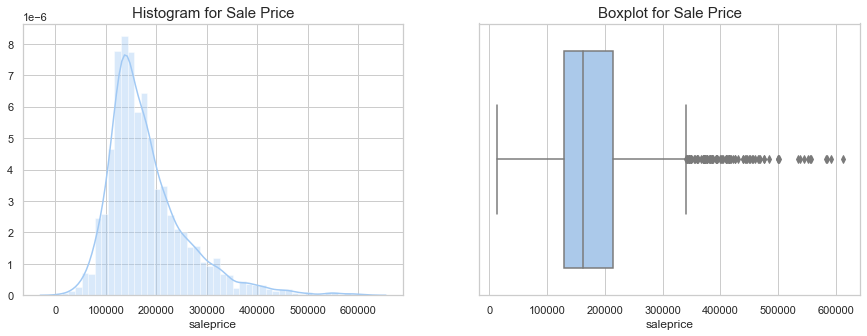

In [53]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(ax=axes[0], a=df['saleprice']);
axes[0].set_title('Histogram for Sale Price',fontsize=15);
sns.boxplot(ax=axes[1],x=df['saleprice'],orient='h', data=df);
axes[1].set_title('Boxplot for Sale Price',fontsize=15);


Looking at our target variable, it is right-skewed and many outliers have been detected by the boxplot. There are no null values, so we won't have to worry about using it in our model.

_Plotting Functions_

A few functions will help us to plot our variables more efficiently.

In [54]:
#We'll define a subplot function to make our visualizations more efficient.
def subplot_boxplots(dataframe, columns, target):
    nrows = int(np.ceil(len(columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(18,3*len(columns))) #Specify figsize
    fig.tight_layout(pad=3.0) #Sets padding between plots
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(columns): # Gives us an index value to get into all our lists
        ax[i].grid(alpha=0.8) #Sets grid transparency
        cat_order = sorted(dataframe[column].unique().tolist()) #Standardise category order alphabetically
        sns.boxplot(ax=ax[i],orient='h',x=target,y=columns[i],data=dataframe,order=cat_order) #Plot boxplot by order
        ax[i].set_title(columns[i],fontsize=15) #Set title to variable name
        ax[i].set_xlabel(columns[i],fontsize=12)
        ax[i].set_ylabel(target, fontsize=12)
        #Finds value counts and prints to the right of the boxplot.
        objects=round(dataframe[column].value_counts(normalize=True).sort_index(),3)
        nobs = objects.values.tolist()
        obs = objects.index.tolist()
        combined = [f'{obs[i]}: ' + str(x) for i,x in enumerate(nobs)]
        string = '\n'.join(combined)
        ax[i].text(0.9, 0.5,string, fontsize=12,ha='center', va='center', 
                   transform=ax[i].transAxes,bbox=dict(facecolor='white', alpha=0.9))


In [55]:
#We'll define a regplot function to make our visualizations more efficient.
def subplot_regplots(dataframe, columns, target,corr_func):
    nrows = int(np.ceil(len(columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(18,3*len(columns))) #Specify figsize
    fig.tight_layout(pad=3.0) #Sets padding between plots
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(columns): # Gives us an index value to get into all our lists
        variable = columns[i]
        ax[i].grid(alpha=0.8) #Sets grid transparency
        sns.regplot(ax=ax[i],x=variable,y=target,data=df,x_jitter = 0.1,scatter_kws = {'alpha': 0.3})
        ax[i].set_xlabel(columns[i],fontsize=12)
        ax[i].set_ylabel(target, fontsize=12)
        ax[i].set_title(variable,fontsize=15) #Set title to variable name
        if corr_func == 'pearson':
            string = "Corr: " + str(round(stats.pearsonr(dataframe[variable],dataframe[target])[0], 2))
        elif corr_func == 'spearman': 
            string = "Corr: " + str(round(stats.spearmanr(dataframe[variable],dataframe[target])[0], 2))
        ax[i].text(0.9, 0.5,string, ha='center', va='center', transform=ax[i].transAxes,bbox=dict(facecolor='white', alpha=0.9))


In [56]:
#Define singular regplot function
def plot_regplot(x_value, y_value, corr_func,title):
    plt.figure(figsize=(8,8))
    plt.grid(alpha=0.8) #Sets grid transparency
    ax = sns.regplot(x=x_value,y=y_value,x_jitter = 0.1,scatter_kws = {'alpha': 0.3})
    plt.title(title,fontsize=15) #Set title to variable name
    if corr_func == 'pearson':
        string = "Corr: " + str(round(stats.pearsonr(x_value,y_value)[0], 2))
    elif corr_func == 'spearman': 
        string = "Corr: " + str(round(stats.spearmanr(x_value,y_value)[0], 2))
    plt.text(0.9, 0.5,string, ha='center', va='center', fontsize=15,transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.9))

In [57]:
#We'll define a subplot function to make our visualizations more efficient.
def subplot_lineplots(dataframe, columns, target):
    nrows = int(np.ceil(len(columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(18,2.5*len(columns))) #Specify figsize
    fig.tight_layout(pad=3.0) #Sets padding between plots
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(columns): # Gives us an index value to get into all our lists
        ax[i].grid(alpha=0.5) #Sets grid transparency
        sns.lineplot(ax=ax[i],x=columns[i],y=target,data=dataframe) #Plot boxplot by order
        ax[i].set_title(columns[i],fontsize=15) #Set title to variable name
        ax[i].set_xlabel(columns[i],fontsize=12)
        ax[i].set_ylabel(target, fontsize=12)
    

#### _Nominal Variables_

In [58]:
nominal = df_info.loc[df_info['type'] == 'Nominal','variable'].tolist() #Create list of nominal variables

Any nominal variables we include in our model will need to be one-hot encoded for each category. Hence, we'll want to prioritize variables that have a clear impact on the sale price. We can loop through the variables to calculate the correlation and record one-hot encoded variables that fulfill the following: 
- They have more than an absolute value of 0.3
- They constitute more than 5% of the total entries 

In [59]:
nominal_dummies = []
for var in nominal:
    value_c = df[var].value_counts(normalize=True).sort_index() #Get the normalized value counts for the variable
    dummy_df = pd.get_dummies(df[var],prefix=var) #One-hot encode variable
    dummy_df = dummy_df.join(df['saleprice']) #Add sale price to one-hot encoded values
    dummy_corr = dummy_df.corr(method='spearman') #Calculate correlation for one-hot encoded values with saleprice
    for i, value in enumerate(dummy_corr['saleprice']): #Loop through saleprice correlations to check for suitable nominal variables
        variable_cat = dummy_corr.index[i]
        if var != 'saleprice' and variable_cat != 'saleprice': #Rule out saleprice correlation (will be 1.0)
            counts = value_c[i]
            if abs(value) >= 0.3 and counts >= 0.05: #Check to see if correlation is more than 0.3 and value counts are sufficient
                entry = {}
                entry['variable'] = var
                entry['var_category'] = variable_cat
                entry['correlation'] = value
                entry['value_counts'] = counts
                nominal_dummies.append(entry) #Add dictionary for variable category to our list

In [60]:
nominal_corr_df = pd.DataFrame(nominal_dummies) #Convert list of dicts to dataframe
nominal_corr_df

variable          var_category  correlation  value_counts
0    ms_subclass        ms_subclass_60     0.418289      0.192101
1      ms_zoning          ms_zoning_RM    -0.362435      0.154071
2   neighborhood  neighborhood_NridgHt     0.339939      0.059483
3   exterior_1st  exterior_1st_VinylSd     0.403258      0.352999
4   exterior_2nd  exterior_2nd_VinylSd     0.397359      0.351536
5   mas_vnr_type     mas_vnr_type_None    -0.432921      0.600296
6     foundation     foundation_CBlock    -0.377445      0.420770
7     foundation      foundation_PConc     0.591159      0.451487
8    central_air         central_air_N    -0.339395      0.068747
9    central_air         central_air_Y     0.339395      0.931253
10   garage_type    garage_type_Attchd     0.465036      0.591419
11   garage_type    garage_type_Detchd    -0.451830      0.261336
12     sale_type         sale_type_New     0.302510      0.078011

We'll take a closer look at these variables before selecting them.

In [61]:
nominal_shortlisted = [var for var in nominal if var in nominal_corr_df['variable'].tolist()] 

In [62]:
nominal_shortlisted

['ms_subclass',
 'ms_zoning',
 'neighborhood',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'central_air',
 'garage_type',
 'sale_type']

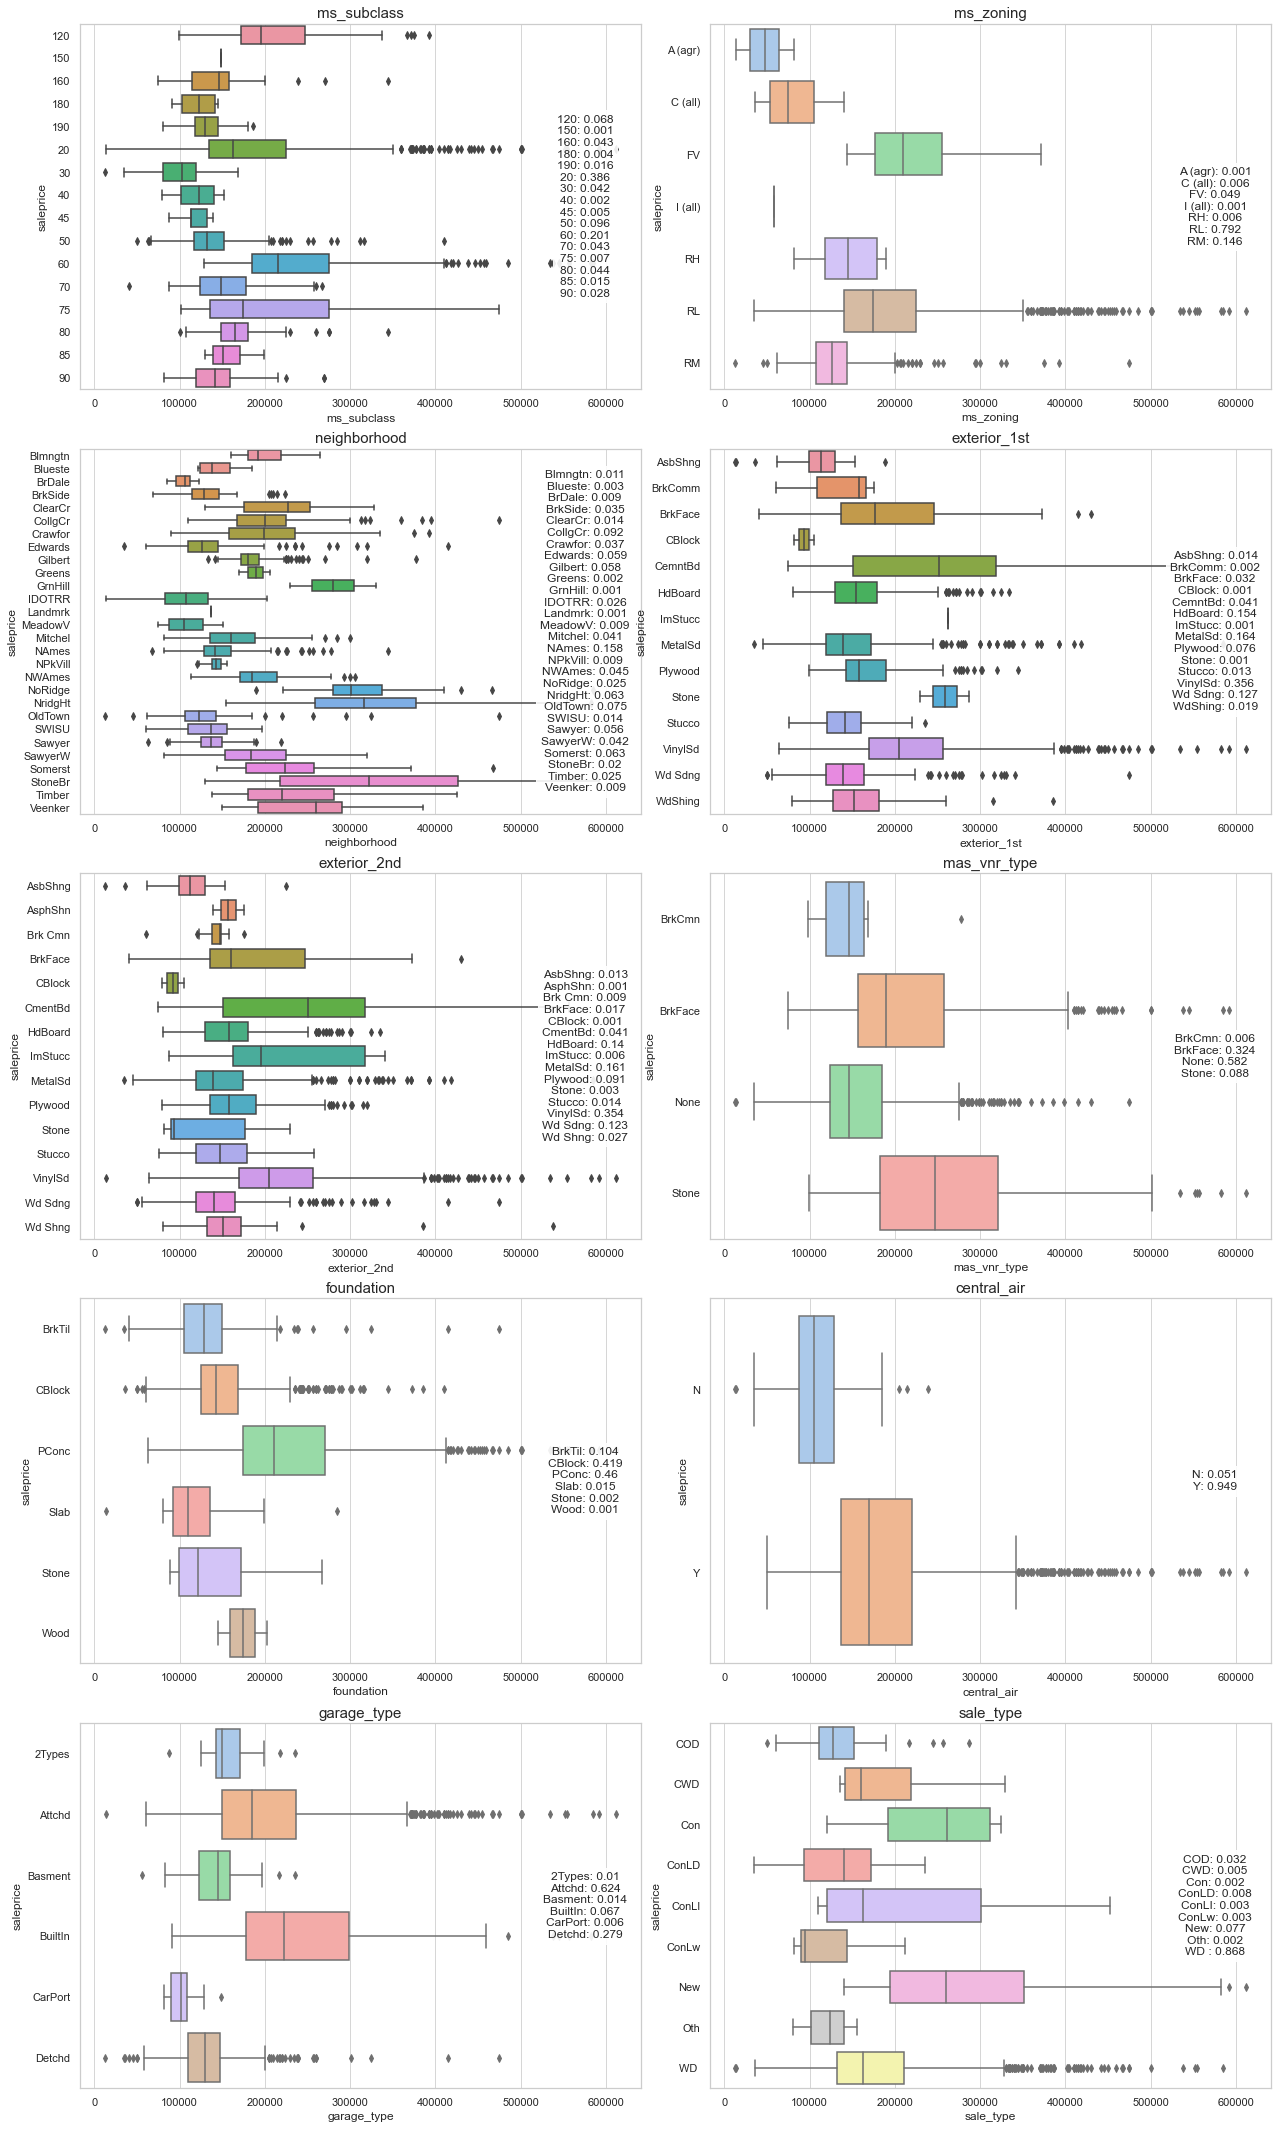

In [63]:
subplot_boxplots(df.dropna(),nominal_shortlisted,'saleprice')

Looking at the boxplots and nominal_corr_df table, we can see that for the variables identified with higher correlations, we can see some differentiation in terms of sale price values. The columns in nominal_shortlisted all have to be encoded. 

In [64]:
for var in nominal_shortlisted:
    dummy_df = pd.get_dummies(df[var],prefix=var)
    df = df.join(dummy_df)

In [65]:
nominal_selected = nominal_corr_df['var_category'].tolist()
nominal_selected

['ms_subclass_60',
 'ms_zoning_RM',
 'neighborhood_NridgHt',
 'exterior_1st_VinylSd',
 'exterior_2nd_VinylSd',
 'mas_vnr_type_None',
 'foundation_CBlock',
 'foundation_PConc',
 'central_air_N',
 'central_air_Y',
 'garage_type_Attchd',
 'garage_type_Detchd',
 'sale_type_New']

In [66]:
#Remove one of the central_air columns as we only need one.
nominal_selected.remove('central_air_N')

In [67]:
#Track the variables that have been used in our transformation, 
#so we can ensure these variables in the test data are also cleaned before transforming.
transformation_variables.extend(nominal_shortlisted)

### _Ordinal Variables_

In [68]:
ordinal = df_info.loc[df_info['type'] == 'Ordinal','variable'].tolist() #Create list of ordinal variables

While the ordinal variables are currently all object types (except for overall_qual and overall_cond) they have a fixed "order" as determined by the data documentation. We will first map the values according to the data documentation, where 0 indicates a "NA" category and the "lowest" tier begins at 1. 

#### _Map ordinal variables_

In [69]:
df['lot_shape'] = df['lot_shape'].map({'IR3':1,'IR2':2,'IR1':3,'Reg':4})
df['utilities'] = df['utilities'].map({'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4})
df['land_slope'] = df['land_slope'].map({'Sev':1,'Mod':2,'Gtl':3})
df['exter_qual'] = df['exter_qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['exter_cond'] = df['exter_cond'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['bsmt_qual'] = df['bsmt_qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['bsmt_cond'] = df['bsmt_cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['bsmt_exposure'] = df['bsmt_exposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['bsmtfin_type_1'] = df['bsmtfin_type_1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['bsmtfin_type_2'] = df['bsmtfin_type_2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['heating_qc'] = df['heating_qc'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['electrical'] = df['electrical'].map({'Mix':1,'FuseP':2,'FuseF':3,'FuseA':4,'SBrkr':5})
df['kitchen_qual'] = df['kitchen_qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['functional'] = df['functional'].map({'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8})
df['fireplace_qu'] = df['fireplace_qu'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['garage_finish'] = df['garage_finish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['garage_qual'] = df['garage_qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['garage_cond'] = df['garage_cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['paved_drive'] = df['paved_drive'].map({'N':1,'P':2,'Y':3})
df['pool_qc'] = df['pool_qc'].map({'NA':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['fence'] = df['fence'].map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})

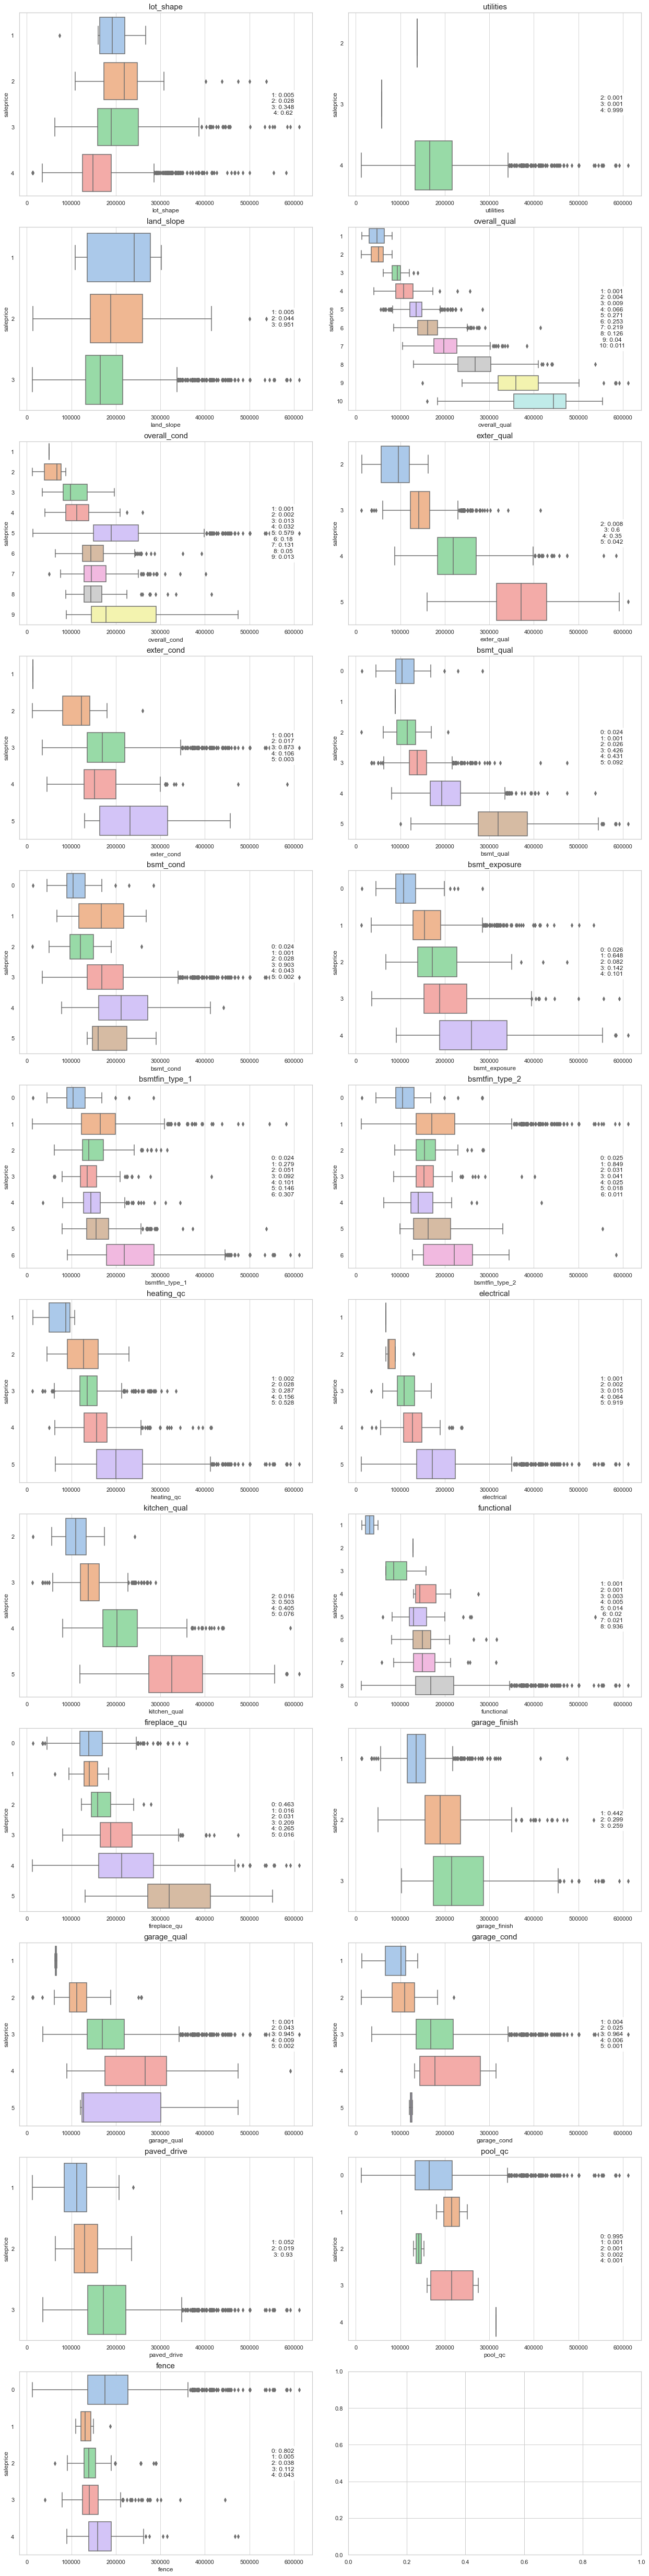

In [70]:
subplot_boxplots(df.dropna(),ordinal,'saleprice')

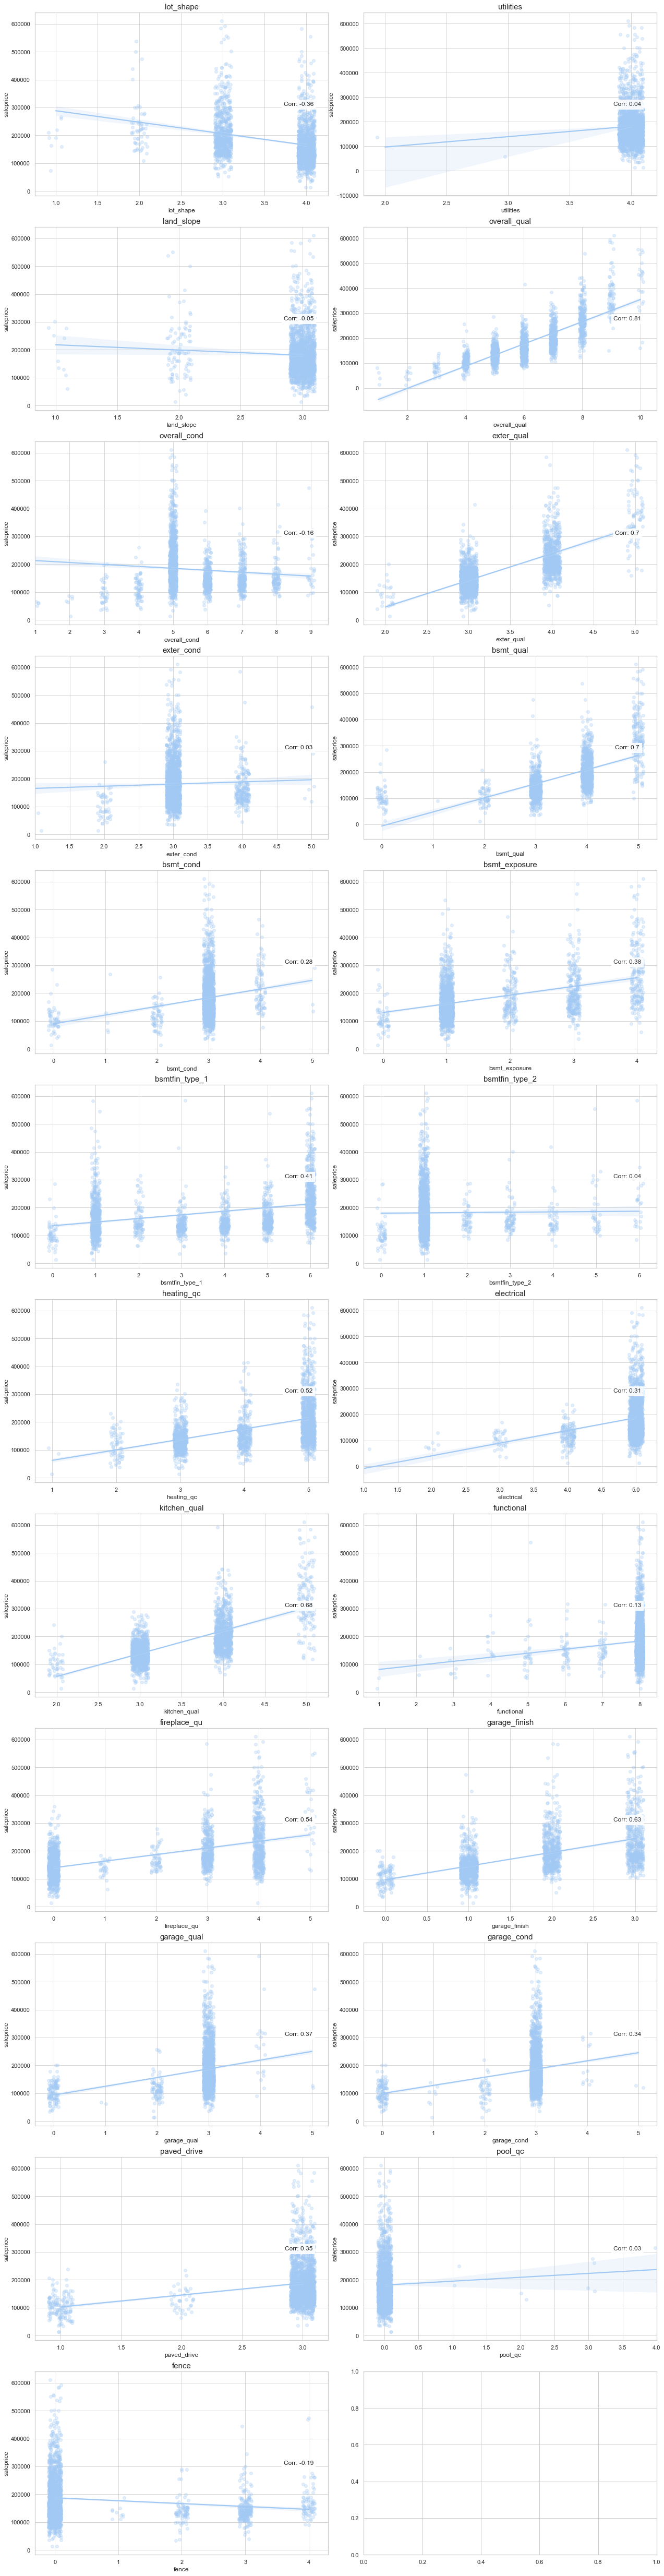

In [71]:
subplot_regplots(df,ordinal,'saleprice','spearman')

Looking at the plots, we can evaluate each variable:

- 'lot_shape': Reject as most values fall into 'Regular' category. Intuitively, the values seem to be skewed as the irregular categories seem to have higher medians.
- 'utilities': Reject as most values fall in one category.
- 'land_slope': Reject as most values fall in one category.
- 'overall_qual': Consider as there is a clear trend in the data.
- 'overall_cond': Consider as there is a clear trend in the data. However, most of the values are in 5.
- 'exter_qual': Consider as there is a clear trend in the data, although some categories have very small values. However, we will be re-encoding the ordinal values so this should be no issue.
- 'exter_cond': Consider as there is a clear trend in the data, although some categories have very small values.
- 'bsmt_qual': Consider - the trend is not as strong compared to some variables, but we will want to include it to see the impact. Additionally, we'll want to compare basement versus no basement.
- 'bsmt_cond': Consider, although the trend is not as strong compared to other variables.
- 'bsmt_exposure': Consider as there is a trend in the data.
- 'bsmtfin_type_1': Consider as there is a trend in the data.
- 'bsmtfin_type_2': Consider, but we may want to combine this with the previous variable.
- 'heating_qc': Consider as there is a clear trend.
- 'electrical': Reject as most values fall into SrBkr.
- 'kitchen_qual': Consider as there is a clear trend in the data.
- 'functional': Reject as most values fall into Typical and some categories have very few instances.
- 'fireplace_qu': Consider as there is a trend in the data.
- 'garage_finish': Consider as there is a clear trend in the data.
- 'garage_qual': Consider as there is a trend in the data.
- 'garage_cond': Consider as there is a trend in the data.
- 'paved_drive': Consider given the trend in the data
- 'pool_qc': Reject as most values fall into 'NA'
- 'fence': Reject as most values fall into 'NA'.

In [72]:
ordinal_shortlisted = ['overall_qual','overall_cond','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical','kitchen_qual','fireplace_qu','garage_finish','garage_qual','garage_cond','paved_drive']

A further look into the correlation between saleprice and our shortlisted ordinal variables. Here, we are using the spearman correlation which is more suited for comparing ordinal variables.

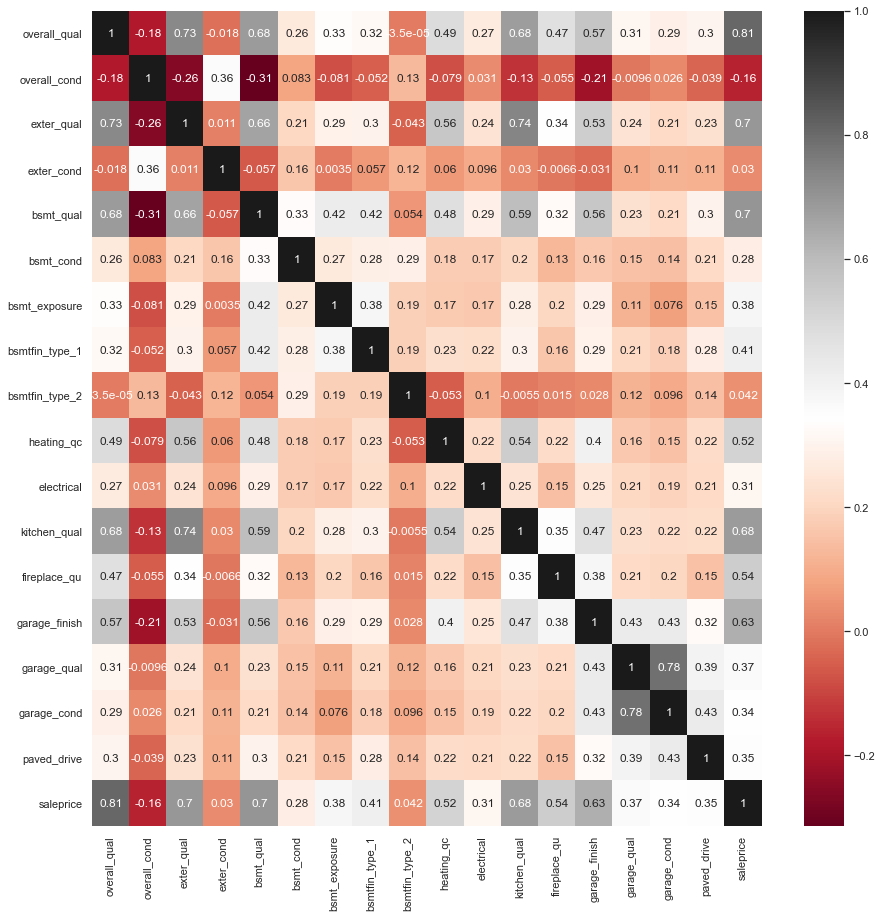

In [73]:
plt.figure(figsize=(15,15))
sns.heatmap(df[ordinal_shortlisted + ['saleprice']].corr(method='spearman'),cmap="RdGy",annot=True);

Many of our shortlisted ordinal variables have a positive correlation of more than 0.3 with the sale price. We can drop all the variables that have a weaker correlation.

In [74]:
ordinal_corr = df[ordinal_shortlisted + ['saleprice']].corr(method='spearman')
ordinal_selected = []
for i, value in enumerate(ordinal_corr['saleprice']):
    if value > 0.3 and ordinal_corr.index[i] != 'saleprice':
        ordinal_selected.append(ordinal_corr.index[i])

In [75]:
ordinal_selected

['overall_qual',
 'exter_qual',
 'bsmt_qual',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'heating_qc',
 'electrical',
 'kitchen_qual',
 'fireplace_qu',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive']

#### _Discrete Variables_

For our discrete variables, most of them only have a few values e.g. range 0-5 but we will want to look at the year variables separately, given that the range of values is much higher. Hence, let's create a list of variables excluding the year variables. 

In [76]:
discrete = df_info.loc[df_info['type'] == 'Discrete','variable'].tolist() #Create list of discrete variables
year_vars = ['year_built','year_remod/add','garage_yr_blt','yr_sold'] #Create list of year variables
discrete_noyears = [x for x in discrete if x not in year_vars] #Create list of discrete vars excluding year vars
discrete_noyears

['bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'mo_sold']

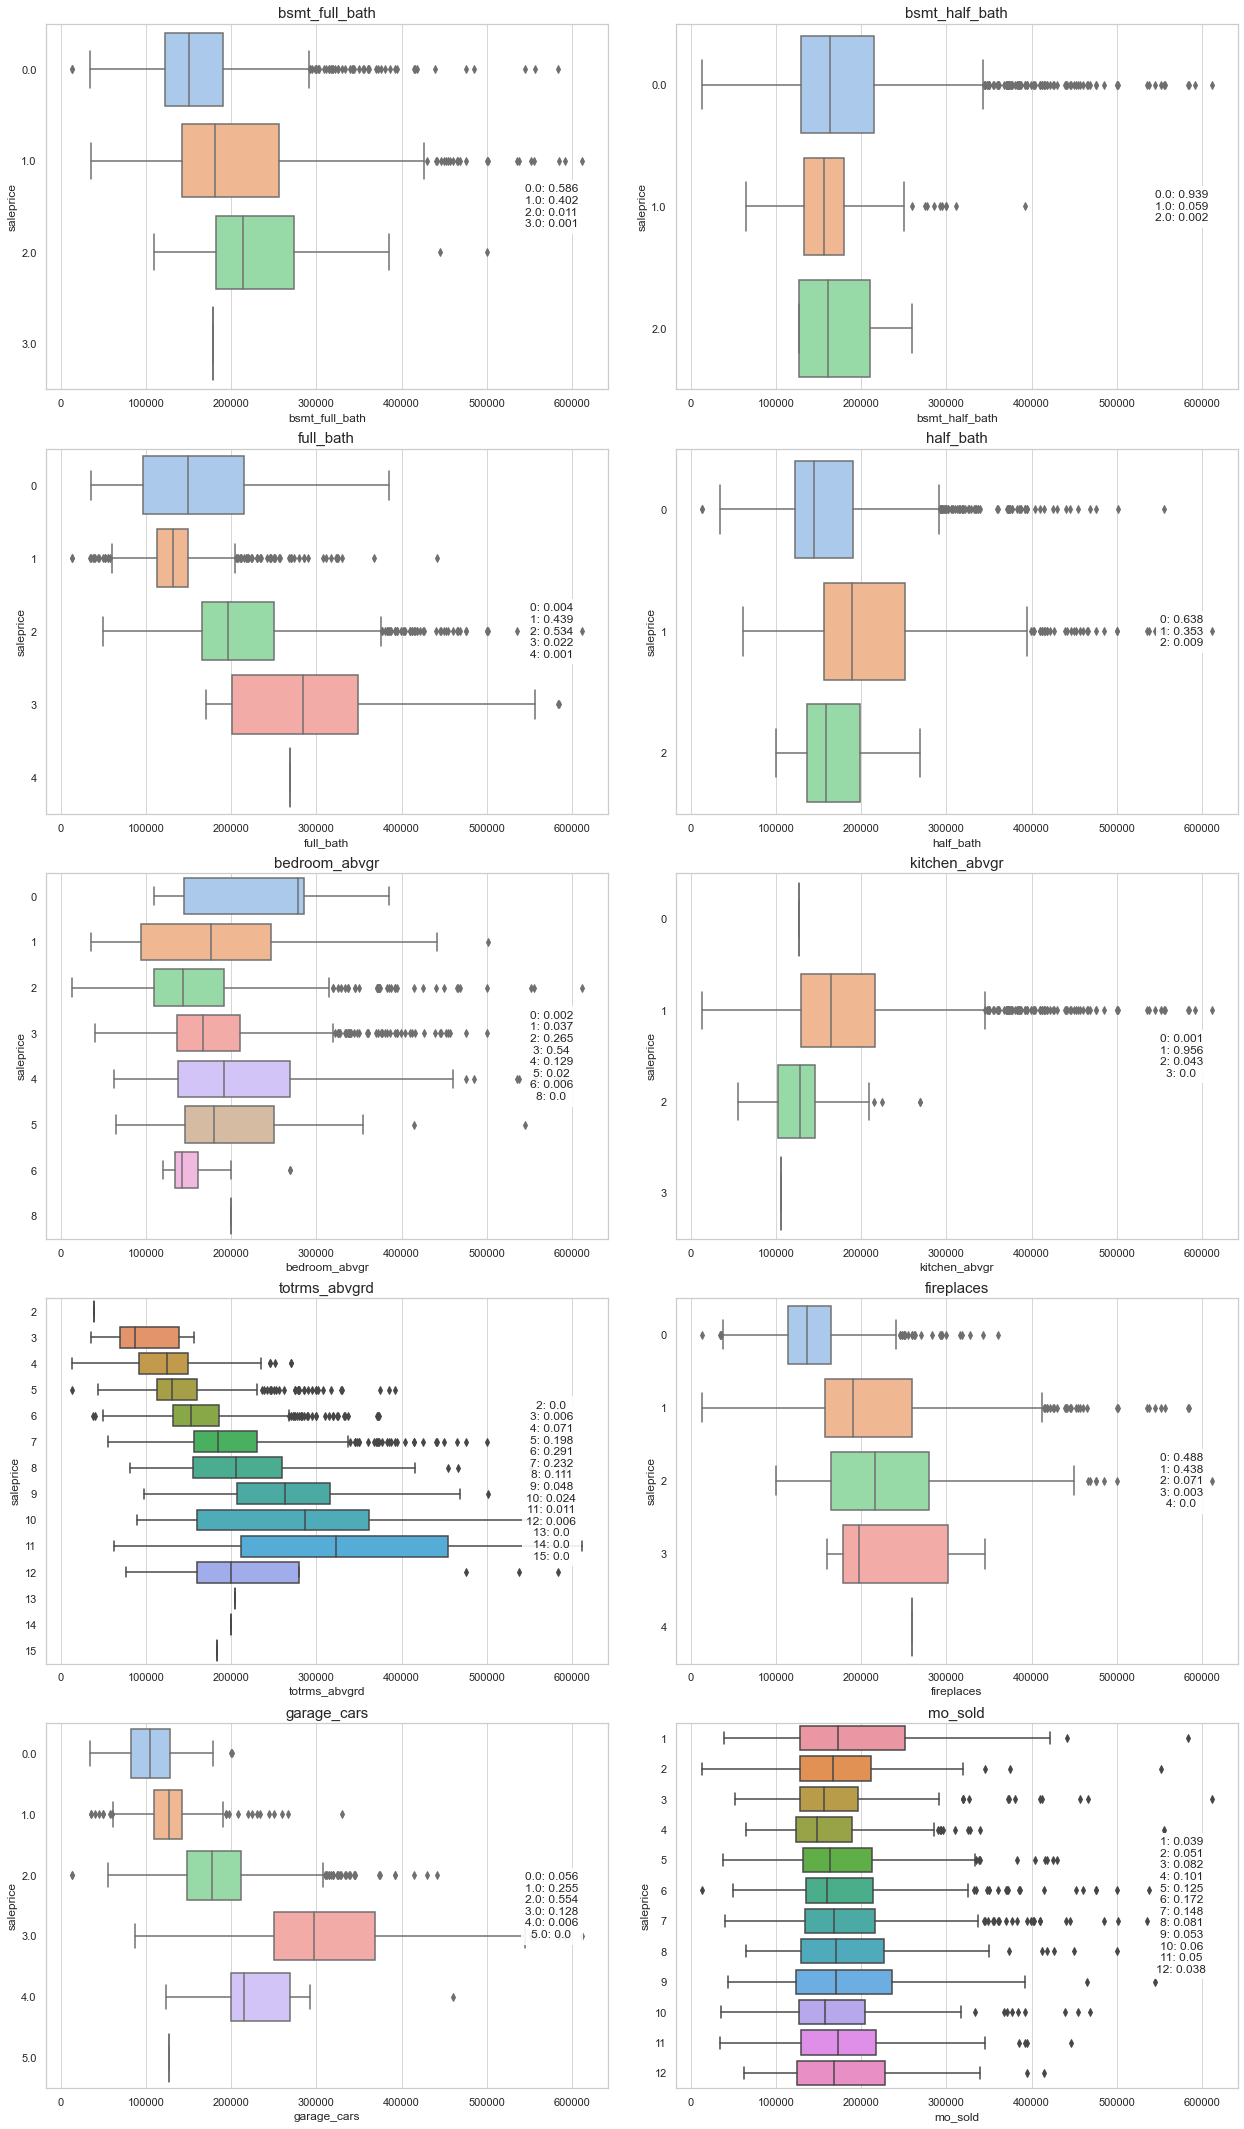

In [77]:
subplot_boxplots(df,discrete_noyears,'saleprice')

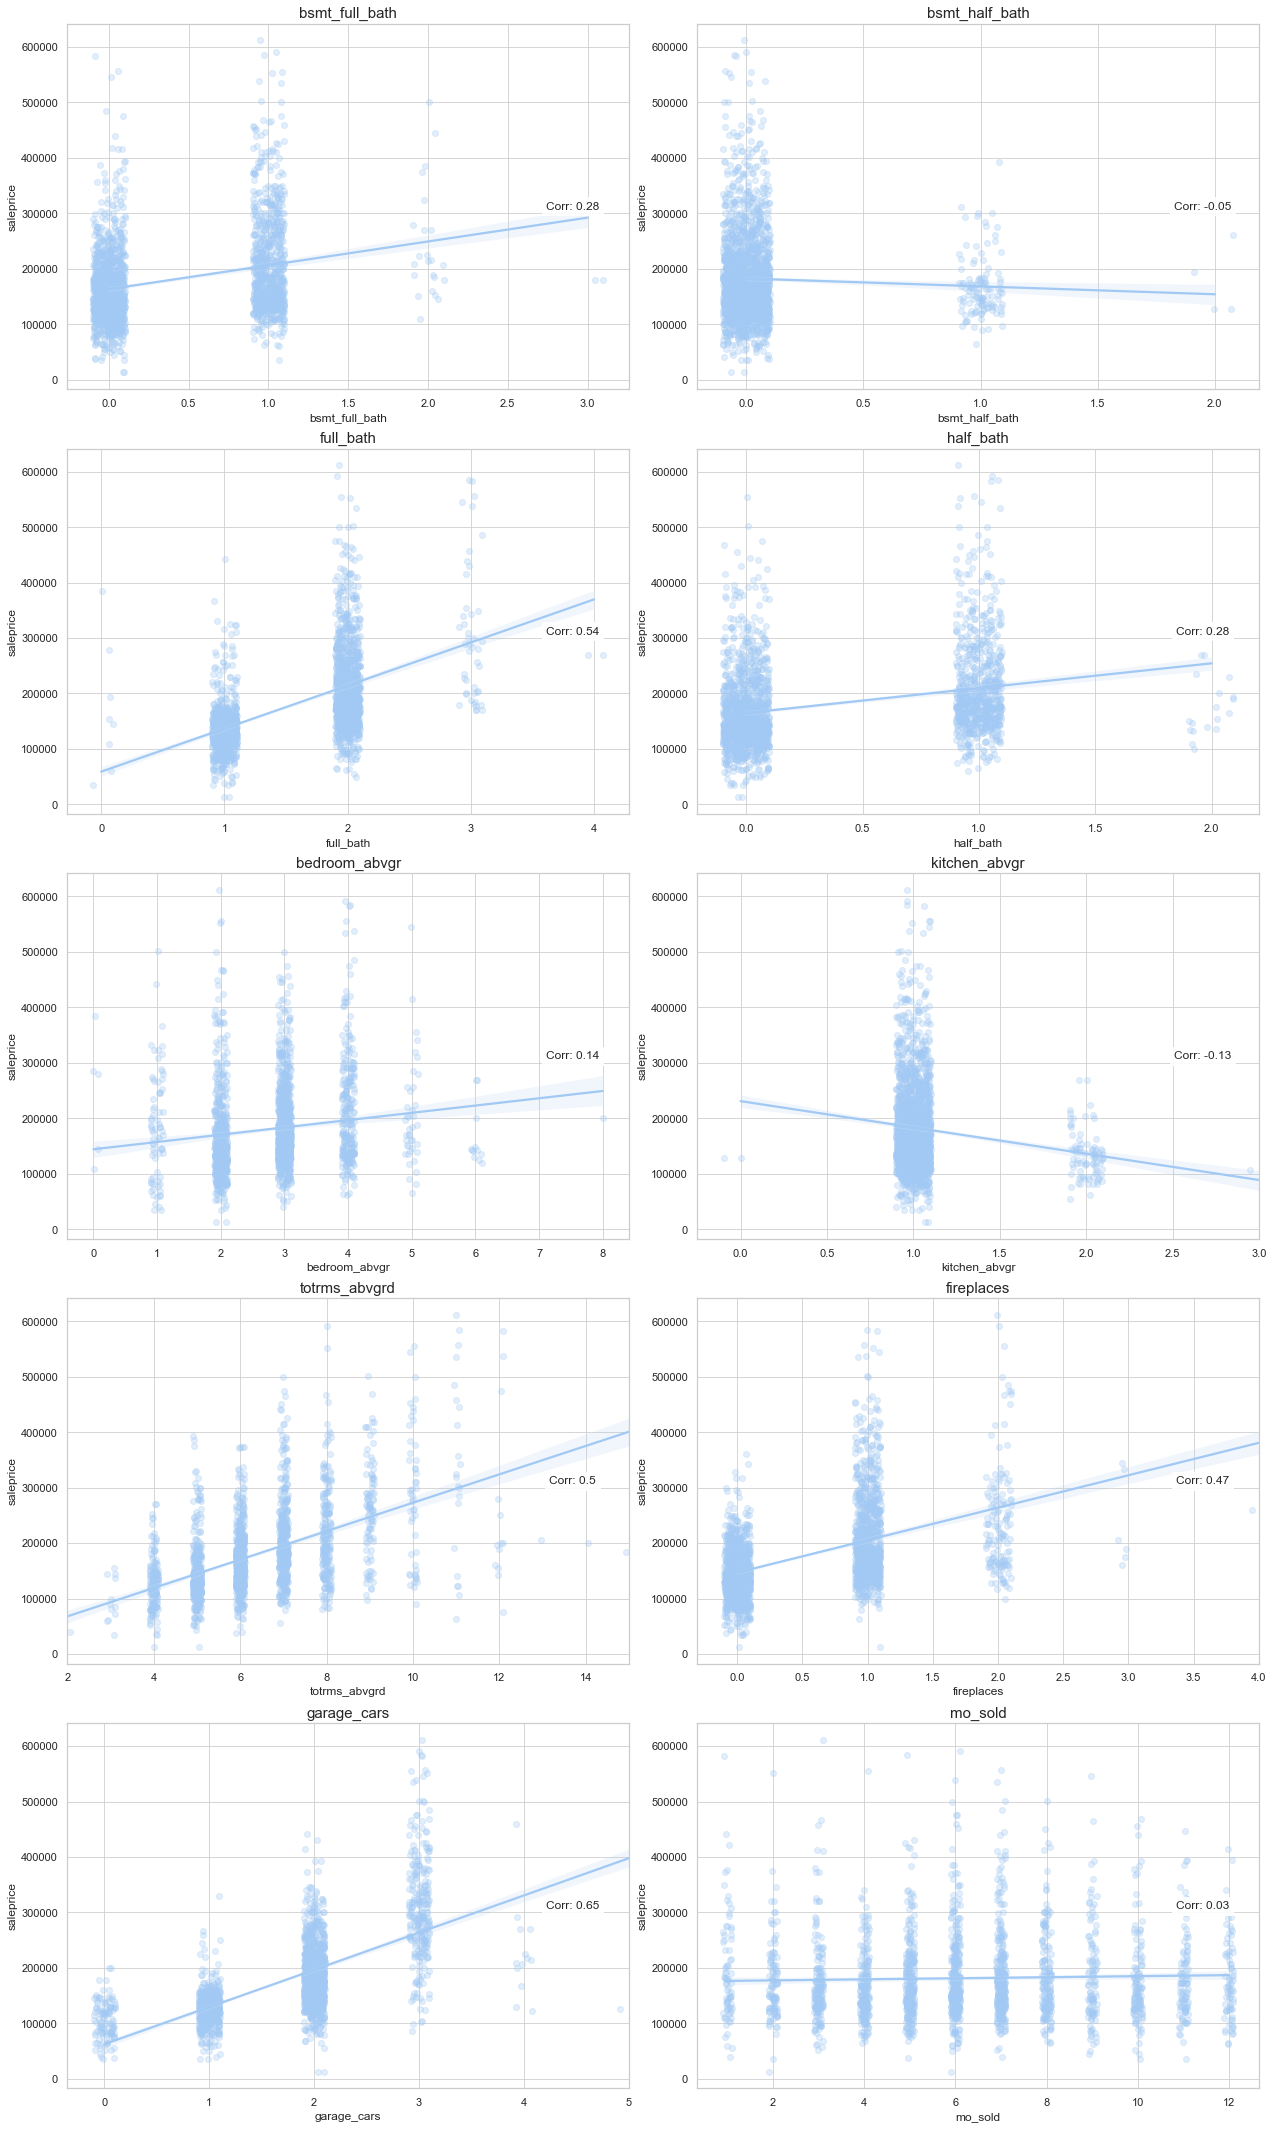

In [78]:
subplot_regplots(df,discrete_noyears,'saleprice','pearson')

Looking at the plots, we can evaluate each variable:

- 'bsmt_full_bath': Consider given the trend in the data
- 'bsmt_half_bath': Reject as no clear trend.
- 'full_bath': Consider given the trend in the data - we may want to consider combining this with bsmt_full_bath
- 'half_bath': Reject as no clear trend.
- 'bedroom_abvgr': Reject as no clear trend.
- 'kitchen_abvgr': Reject as most values fall into 1
- 'totrms_abvgrd': Consider given the trend in the data
- 'fireplaces': Consider given the trend in the data
- 'garage_cars': Consider given the trend in the data
- 'mo_sold': Reject as there is no clear trend



In [79]:
df['total_bath'] = df['bsmt_full_bath'] + df['full_bath']

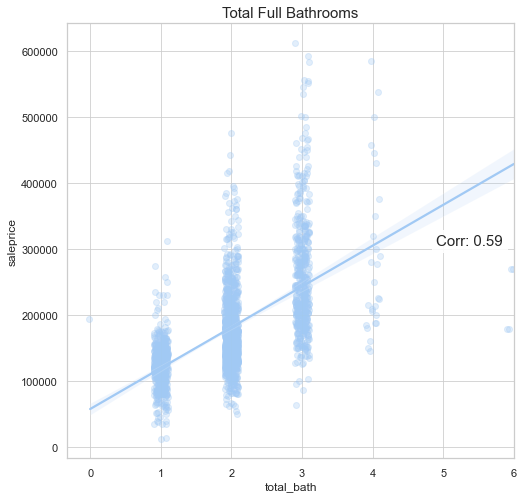

In [80]:
plot_regplot(df['total_bath'], df['saleprice'], 'pearson', 'Total Full Bathrooms')

The correlation score is better than the two original variables, so let's include it as a selected variable.

In [81]:
transformation_variables.extend(['bsmt_full_bath', 'full_bath']) #Keep track of variables used for interaction

In [82]:
new_selected.append('total_bath') # Add variable to list of created features

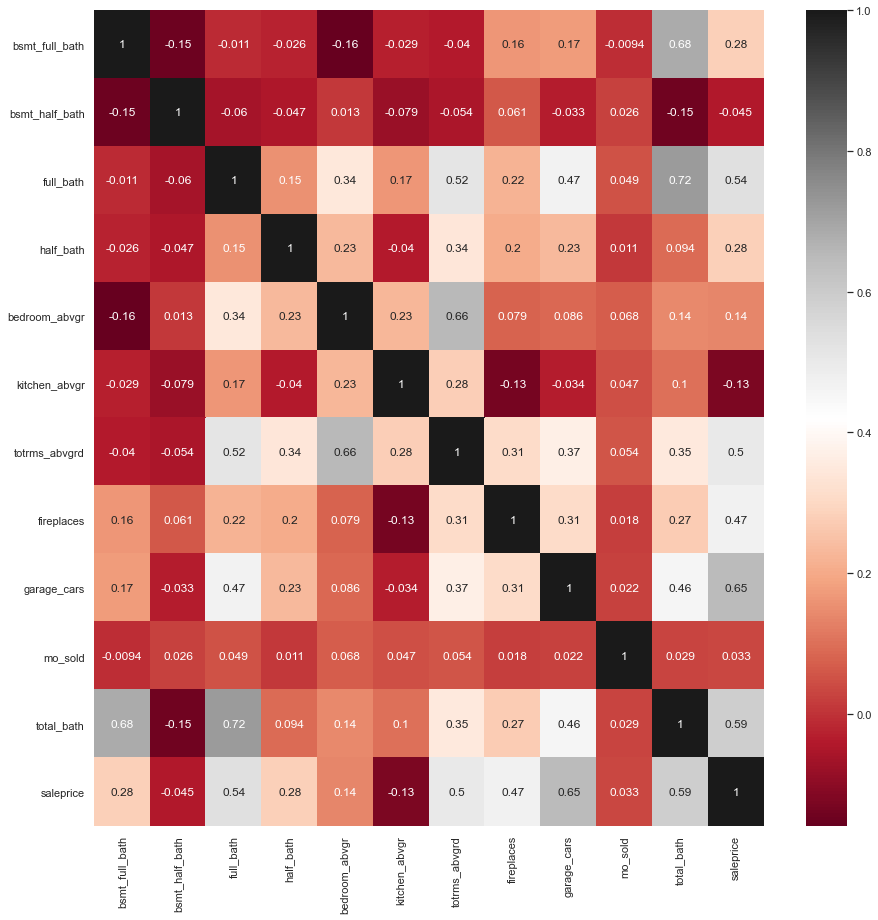

In [83]:
plt.figure(figsize=(15,15))
sns.heatmap(df[discrete_noyears + ['total_bath','saleprice']].corr(method='pearson'),cmap="RdGy",annot=True);

We will select the variables with more than 0.3 correlation - all of which have correlation of more than 0.45.

In [84]:
discrete_selected = ['totrms_abvgrd','fireplaces','garage_cars']

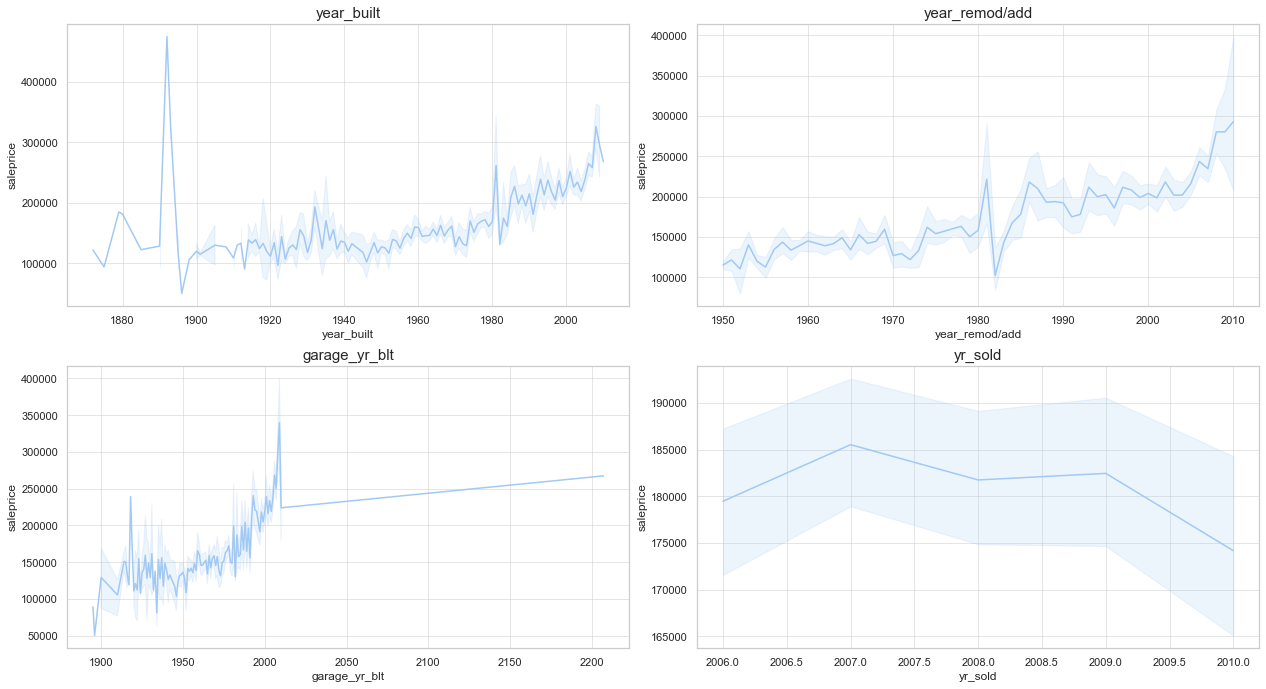

In [85]:
subplot_lineplots(df,year_vars,'saleprice')

From the graph, we can see that garage_yr_blt has an extreme outlier of a year in the 2200+ range, which is impossible. We will locate this row and drop it given that we can't attest to the accuracy of the entry.

In [86]:
df.loc[df['garage_yr_blt'] > 2200,:]['garage_yr_blt']

1699    2207.0
Name: garage_yr_blt, dtype: float64

In [87]:
df.drop(labels = [1699], inplace=True)
df.reset_index(inplace=True)

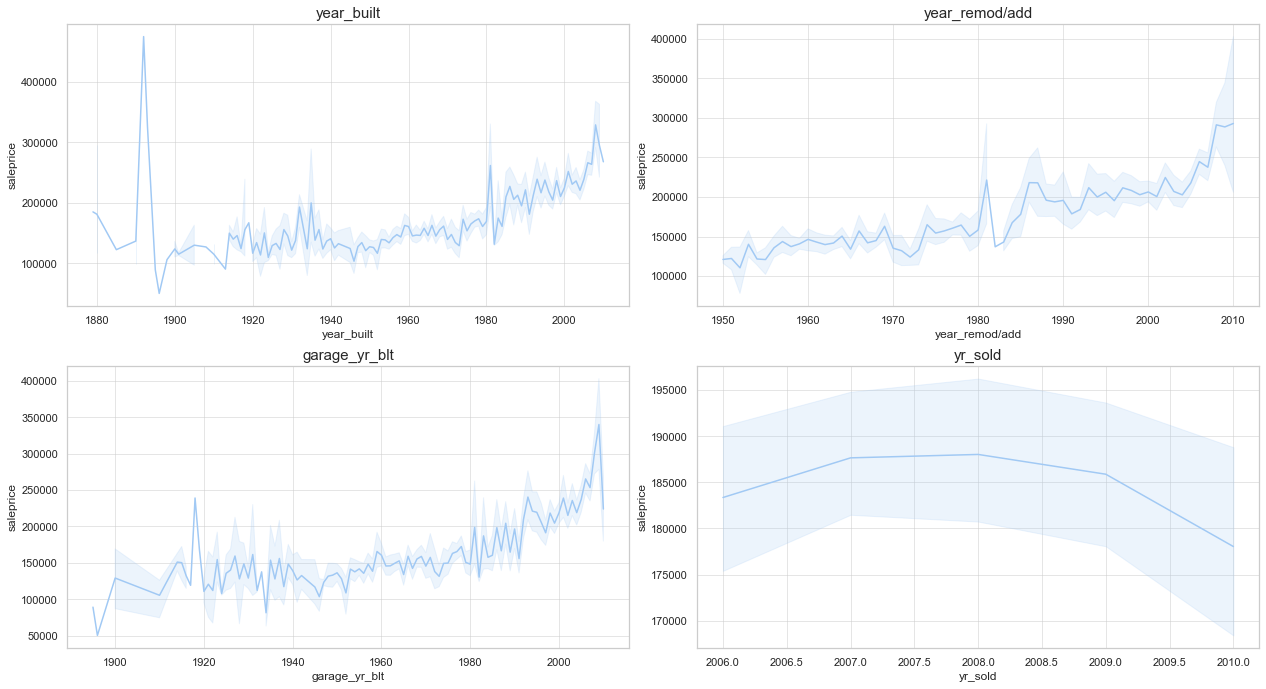

In [88]:
subplot_lineplots(df.dropna(),year_vars,'saleprice')

In [89]:
df[year_vars+['saleprice']].dropna().corr()

year_built  year_remod/add  garage_yr_blt   yr_sold  saleprice
year_built        1.000000        0.650167       0.838031  0.001288   0.560171
year_remod/add    0.650167        1.000000       0.683652  0.044175   0.544660
garage_yr_blt     0.838031        0.683652       1.000000 -0.002653   0.540654
yr_sold           0.001288        0.044175      -0.002653  1.000000  -0.017083
saleprice         0.560171        0.544660       0.540654 -0.017083   1.000000

The variables year_built, year_remod/add and garage_yr_blt all have a positive correlation of more than 0.5 with sale price. Per our previous investigation, garage_yr_blt has more than 100+ null values and would require further data imputation. Since there is a relatively strong relationship between year_built and garage_yr_blt and +0.8, we can incorporate the former into our model and leave the latter out.

From the data documentation we know that the year remodeled is the same as year_built if there was no remodeling. Hence, it would make more sense to look at a variable that encodes whether or not the house has been remodeled.

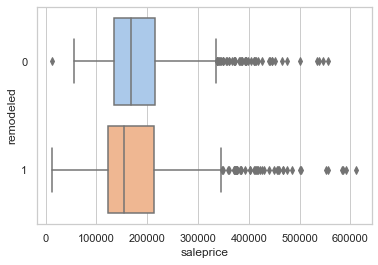

In [90]:
remodeled = df['year_built'] != df['year_remod/add']
df['remodeled'] = [1 if x is True else 0 for x in remodeled]
sns.boxplot(df['saleprice'],df['remodeled'],orient='h');

In [91]:
df['remodeled'].value_counts(normalize=True)

0    0.537073
1    0.462927
Name: remodeled, dtype: float64

Remodeling does not seem to have a clear impact on the price, so we can leave it out of our model. Lastly, year sold has a relatively small range of values (since the data was collected only for houses sold withn 2006-2010.) However, we don't have access to an important characteristic of the house with these year variables: age. This can be calculated with the variables we have on hand:

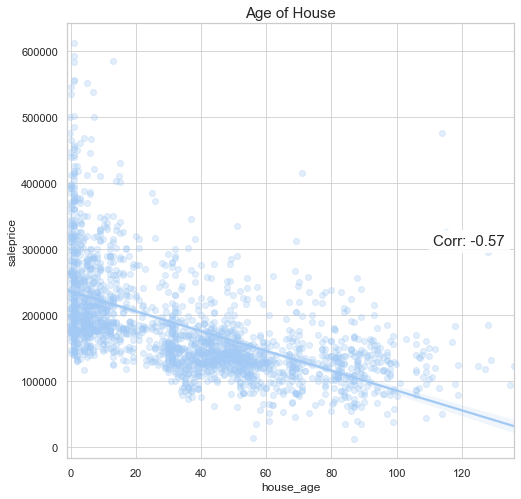

In [92]:
df['house_age'] = df['yr_sold'] - df['year_built'] #Create new variable for house age
plot_regplot(df['house_age'], df['saleprice'], 'pearson', 'Age of House') #Plot house age against sale price

The resulting variable house_age has a stronger absolute correlation to sale price than both year_sold and year_built, so let's include this variable instead.

In [93]:
transformation_variables.extend(['yr_sold', 'year_built'])

In [94]:
new_selected.append('house_age')

#### Continuous Variables

In [95]:
continuous = df_info.loc[df_info['type'] == 'Continuous','variable'].tolist() #Create list of continuous variables
continuous

['lot_frontage',
 'lot_area',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'garage_area',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'saleprice']

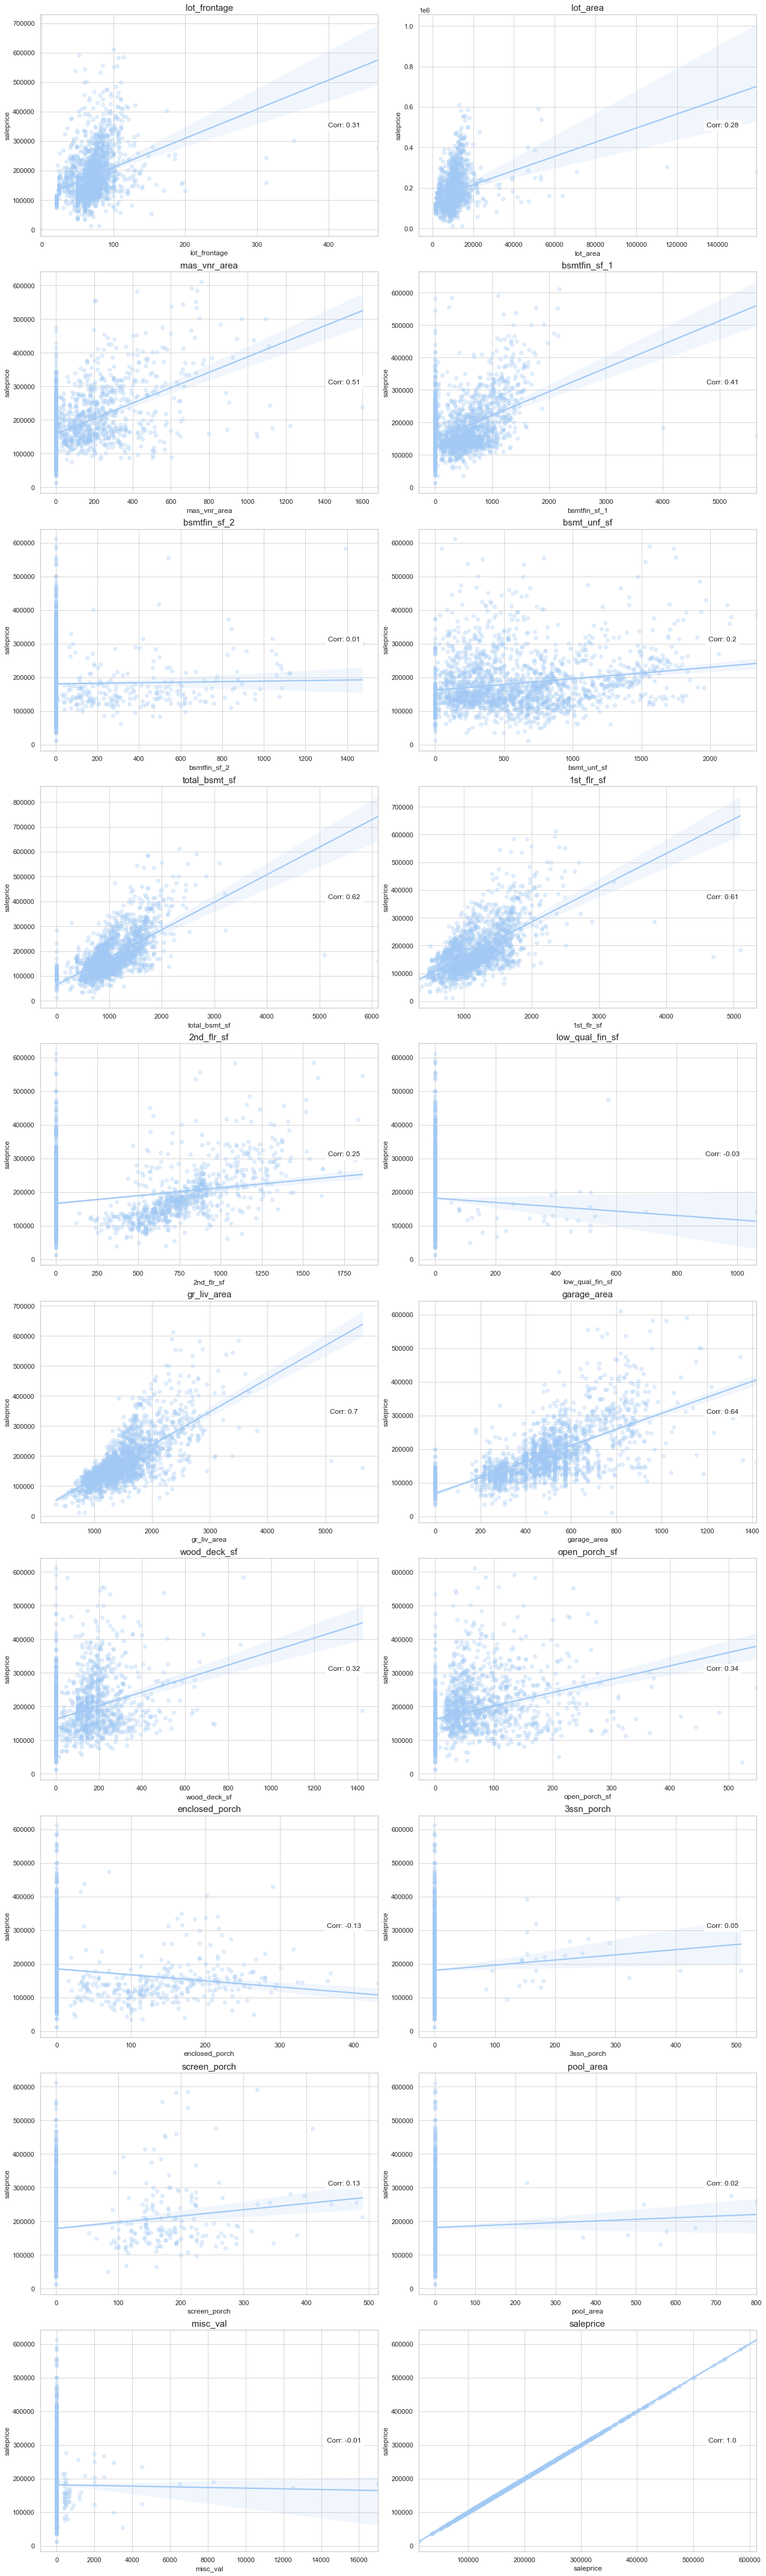

In [96]:
subplot_regplots(df.dropna(),continuous,'saleprice','pearson')

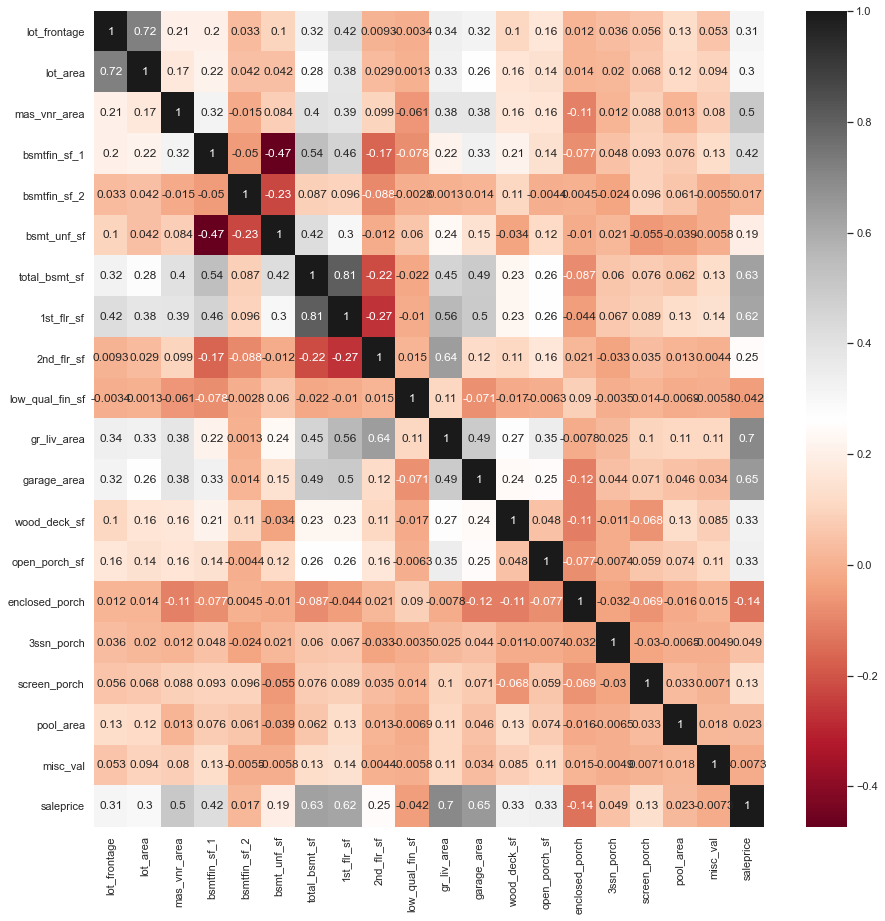

In [97]:
plt.figure(figsize=(15,15))
sns.heatmap(df[continuous].corr(method='pearson'),cmap="RdGy",annot=True);

We have quite a few variables that are strongly correlated with sale price. However, intuitively, lot_area seems to have a relatively low correlation at only 0.3. This may be due to the relatively large values in lot_area that skew the distribution. 

We will try to transform a few variables to see if we can increase the correlation.

In [98]:
df['lot_area_log'] = np.log10(df['lot_area'])
df['total_sf'] = df['total_bsmt_sf'] + df['1st_flr_sf'] + df['2nd_flr_sf']
df['liv_garage_area'] = df['gr_liv_area']+df['garage_area']
df['combined_deck_sf'] = df['wood_deck_sf']+df['open_porch_sf']+df['screen_porch']

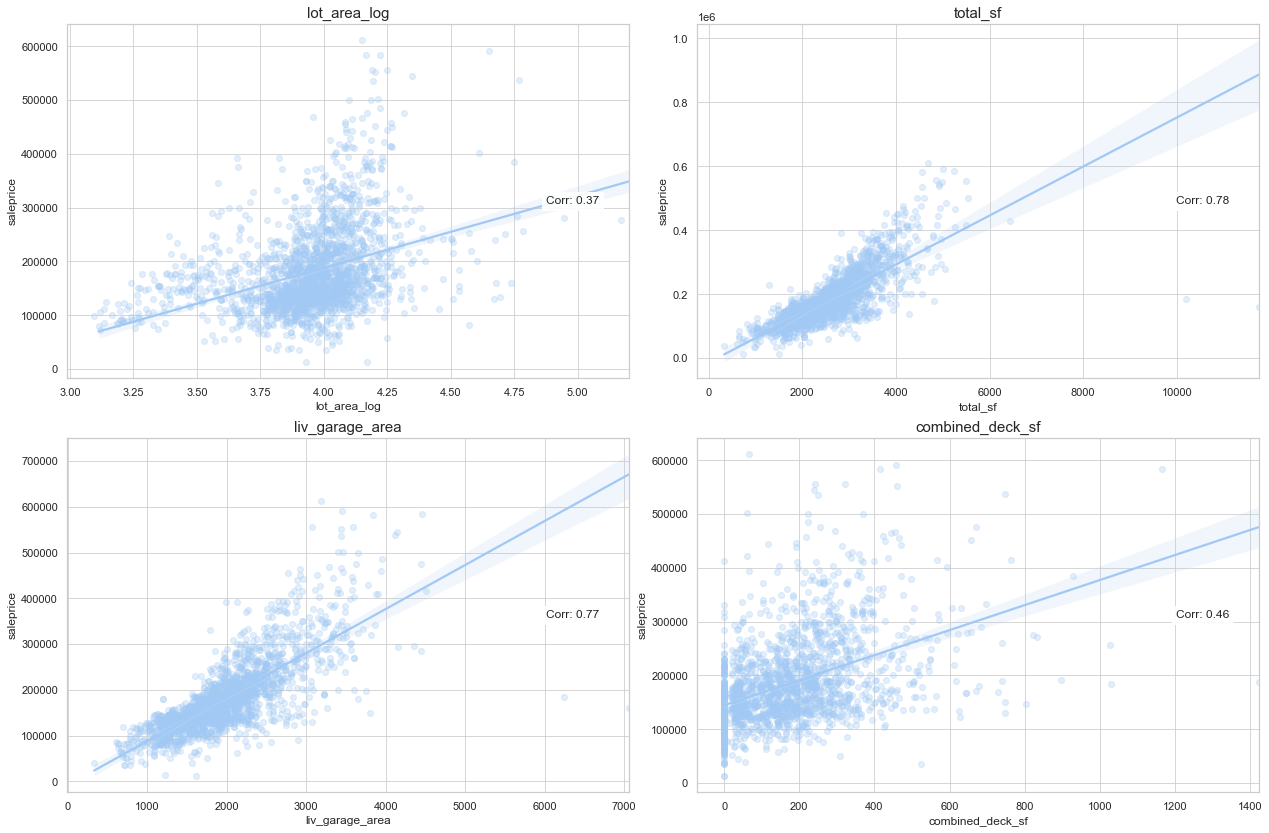

In [99]:
subplot_regplots(df,['lot_area_log','total_sf','liv_garage_area','combined_deck_sf'],'saleprice','pearson')

In all of the above variables, the transformation gives us a stronger correlation than the original/individual variables and should be used in place of the original variables.

In [100]:
#Track the variables that have been used in our transformation, so we can ensure these variables in the test data are also cleaned before transforming.
transformation_variables.extend(['lot_area', 'total_bsmt_sf' , '1st_flr_sf', '2nd_flr_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf','open_porch_sf','screen_porch'])


In [101]:
continuous_selected = ['lot_frontage','mas_vnr_area','bsmtfin_sf_1'] #Track continuous variables we want to use in the model

In [102]:
new_selected.extend(['liv_garage_area','total_sf','lot_area_log','combined_deck_sf'])

In [103]:
all_selected = nominal_selected + ordinal_selected + discrete_selected + continuous_selected + new_selected

Now that we have a list of shortlisted variables, we also want to check for high collinearity between our variables selected at this stage.

In [104]:
df_var_corr = df[all_selected].corr() #Calculate correlation for selected variables 
high_corr = [] #Create list to store
for x in df_var_corr.columns.tolist(): 
    for i,value in enumerate(df_var_corr[x]):
        if value > 0.9 and df_var_corr.index[i] != x: #Check to see for correlation of more than 0.9 
            high_corr.append((df_var_corr.index[i],x)) #Append both variables to high_corr list
            
high_corr

[('exterior_2nd_VinylSd', 'exterior_1st_VinylSd'),
 ('exterior_1st_VinylSd', 'exterior_2nd_VinylSd'),
 ('garage_cond', 'garage_qual'),
 ('garage_qual', 'garage_cond')]

Since there is a high correlation between the two sets of variables, we can drop one in each set. Garage quality and exterior_1st_VinylSd have a higher correlation with sale price so we will keep them.

In [105]:
#Remove our features from all_selected and the respective var type categories.

all_selected.remove('garage_cond')
all_selected.remove('exterior_2nd_VinylSd')
ordinal_selected.remove('garage_cond')
nominal_selected.remove('exterior_2nd_VinylSd')

In [106]:
df_info = display_var_info(df)

In [107]:
df_info.loc[df_info['status'] == 'Selected',:]

variable   dtypes  isnull        type    status
5            lot_frontage  float64       0  Continuous  Selected
19           overall_qual    int64       0     Ordinal  Selected
28           mas_vnr_area  float64       0  Continuous  Selected
29             exter_qual    int64       0     Ordinal  Selected
32              bsmt_qual    int64       0     Ordinal  Selected
34          bsmt_exposure    int64       0     Ordinal  Selected
35         bsmtfin_type_1    int64       0     Ordinal  Selected
36           bsmtfin_sf_1  float64       0  Continuous  Selected
42             heating_qc    int64       0     Ordinal  Selected
44             electrical    int64       0     Ordinal  Selected
55           kitchen_qual    int64       0     Ordinal  Selected
56          totrms_abvgrd    int64       0    Discrete  Selected
58             fireplaces    int64       0    Discrete  Selected
59           fireplace_qu    int64       0     Ordinal  Selected
62          garage_finish    int64       0     Ordinal  Selected
63            garage_cars  float64       0    Discrete  Selected
65            garage_qual    int64       0     Ordinal  Selected
67            paved_drive    int64       0     Ordinal  Selected
92         ms_subclass_60    uint8       0        None  Selected
104          ms_zoning_RM    uint8       0        None  Selected
124  neighborhood_NridgHt    uint8       0        None  Selected
145  exterior_1st_VinylSd    uint8       0        None  Selected
165     mas_vnr_type_None    uint8       0        None  Selected
168     foundation_CBlock    uint8       0        None  Selected
169      foundation_PConc    uint8       0        None  Selected
174         central_air_Y    uint8       0        None  Selected
176    garage_type_Attchd    uint8       0        None  Selected
180    garage_type_Detchd    uint8       0        None  Selected
188         sale_type_New    uint8       0        None  Selected
191            total_bath  float64       0        None  Selected
193             house_age    int64       0        None  Selected
194          lot_area_log  float64       0        None  Selected
195              total_sf  float64       0        None  Selected
196       liv_garage_area  float64       0        None  Selected
197      combined_deck_sf    int64       0        None  Selected

In [108]:
len(all_selected)

35

# 4. Model Fit and Testing

We'll first create a few functions to make our testing more efficient.

In [109]:
#Function to print metrics; returns R^2, adjusted R^2 and RMSE
def get_metrics(y_true, y_pred, p):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)
    return r2, r2a, rmse

In [110]:
#Function to return R^2 adjusted
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [111]:
#Function that takes in X_train_scaled, X_test_scaled, y_train, y_test, fits a corresponding linear model 
#and prints model metrics and returns a dictionary of metrics 
def view_linear_model(X,X_train_scaled, X_test_scaled, y_train, y_test,desc):
    lr = LinearRegression()
    
    cv_score_r2 = cross_val_score(lr, X_train_scaled,y_train,cv=10).mean()
    cv_score_sqrtmse = np.sqrt(-cross_val_score(lr, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error').mean())
    
    lr.fit(X_train_scaled,y_train)
    y_pred_train = lr.predict(X_train_scaled)
    y_pred = lr.predict(X_test_scaled)
    p = X.shape[1]    

    print('CV R^2                  = ', cv_score_r2)
    print('CV SqrtMSE              = ', cv_score_sqrtmse)
    print('')
    print('Performance on Train Data')
    trainr2, trainr2a, trainrmse = get_metrics(y_train, y_pred_train, p)
    print('')
    print('Performance on Test Data')
    testr2, testr2a, testrmse = get_metrics(y_test, y_pred, p)
    return {'Method':'Linear', 'Desc': desc,'Alpha':'NA','Variable Count': p, 'CV R^2 Score': cv_score_r2, 
            'CV RMSE': cv_score_sqrtmse, 'Train R^2 Score': trainr2, 'Train Adj R^2 Score': trainr2a, 
            'Train RMSE': trainrmse, 'Test R^2 Score': testr2, 'Test Adj R^2 Score': testr2a, 'Test RMSE': testrmse}


In [112]:
#Function that takes in X_train_scaled, X_test_scaled, y_train, y_test, fits a corresponding Lasso CV model,
#retrieves the best alpha via LassoCV and instantiates and fits with a Lasso model
#and prints model metrics and returns a dictionary of metrics 
def view_lassoCV_model(X, X_train_scaled, X_test_scaled, y_train, y_test,alpha_range,iterations,desc):
    lasso_cv = LassoCV(alphas=alpha_range, max_iter=iterations)
    lasso_cv.fit(X_train_scaled,y_train)
    best_alpha = lasso_cv.alpha_
   
    lasso = Lasso(alpha=best_alpha,max_iter=iterations)
    cv_score_r2 = cross_val_score(lasso, X_train_scaled,y_train,cv=10).mean()
    cv_score_sqrtmse = np.sqrt(-cross_val_score(lasso, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error').mean())
    
    lasso.fit(X_train_scaled,y_train)
    
    coefs = lasso.coef_.tolist()
    actual_coefs = [i for i in coefs if i > 0]
    
    y_pred_train = lasso.predict(X_train_scaled)
    y_pred = lasso.predict(X_test_scaled)
    p = X.shape[1]    

    print('Lasso Alpha             = ', best_alpha)
    print('Variables with coefs >0 = ', len(actual_coefs))
    print('')

    print('CV R^2                  = ', cv_score_r2)
    print('CV SqrtMSE              = ', cv_score_sqrtmse)
    print('')
    print('Performance on Train Data')
    trainr2, trainr2a, trainrmse = get_metrics(y_train, y_pred_train, p)
    print('')
    print('Performance on Test Data')
    print(lasso.score(X_test_scaled,y_test))
    testr2, testr2a, testrmse = get_metrics(y_test, y_pred, p)
    return {'Method':'Lasso', 'Desc': desc,'Alpha':best_alpha,'Variable Count': p, 'CV R^2 Score': cv_score_r2, 
            'CV RMSE': cv_score_sqrtmse, 'Train R^2 Score': trainr2, 'Train Adj R^2 Score': trainr2a, 
            'Train RMSE': trainrmse, 'Test R^2 Score': testr2, 'Test Adj R^2 Score': testr2a, 'Test RMSE': testrmse}

In [113]:
#Function that takes in X_train_scaled, X_test_scaled, y_train, y_test, fits a corresponding Ridge CV model,
#retrieves the best alpha via RidgeCV and instantiates and fits with a Ridge model
#and prints model metrics and returns a dictionary of metrics 

def view_ridgeCV_model(X, X_train_scaled, X_test_scaled, y_train, y_test, alpha_range,desc):
    ridge_cv = RidgeCV(alphas=alpha_range,store_cv_values=True)
    
    
    ridge_cv.fit(X_train_scaled,y_train)
    best_alpha = ridge_cv.alpha_
   
    ridge = Ridge(alpha=best_alpha)
    cv_score_r2 = cross_val_score(ridge, X_train_scaled,y_train,cv=10).mean()
    cv_score_sqrtmse = np.sqrt(-cross_val_score(ridge, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error').mean())
    ridge.fit(X_train_scaled,y_train)
    y_pred_train = ridge.predict(X_train_scaled)
    y_pred = ridge.predict(X_test_scaled)
    p = X.shape[1]    

    print('Ridge Alpha             = ', best_alpha)
    print('CV R^2                  = ', cv_score_r2)
    print('CV SqrtMSE              = ', cv_score_sqrtmse)
    print('')
    print('Performance on Train Data')
    trainr2, trainr2a, trainrmse = get_metrics(y_train, y_pred_train, p)
    print('')
    print('Performance on Test Data')
    testr2, testr2a, testrmse = get_metrics(y_test, y_pred, p)
    return {'Method':'Ridge', 'Desc': desc,'Alpha':best_alpha,'Variable Count': p, 'CV R^2 Score': cv_score_r2, 
            'CV RMSE': cv_score_sqrtmse, 'Train R^2 Score': trainr2, 'Train Adj R^2 Score': trainr2a, 
            'Train RMSE': trainrmse, 'Test R^2 Score': testr2, 'Test Adj R^2 Score': testr2a, 'Test RMSE': testrmse}


In [114]:
#Function that takes in X_train_scaled, X_test_scaled, y_train, y_test, fits a corresponding Enet CV model,
#retrieves the best alpha via EnetCV and instantiates and fits with a Enet model
#and prints model metrics and returns a dictionary of metrics 
def view_enet_model(X, X_train_scaled, X_test_scaled, y_train, y_test,l1_ratio,alpha_range,iterations,desc):
    enet_cv = ElasticNetCV(l1_ratio=l1_ratio,alphas=alpha_range,max_iter=iterations)
   
    enet_cv.fit(X_train_scaled,y_train)
    best_alpha = enet_cv.alpha_
    enet = ElasticNet(l1_ratio=l1_ratio,alpha=best_alpha,max_iter=10000)
    cv_score_r2 = cross_val_score(enet, X_train_scaled,y_train,cv=10).mean()
    cv_score_sqrtmse = np.sqrt(-cross_val_score(enet, X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error').mean())
    enet.fit(X_train_scaled,y_train)
    y_pred_train = enet.predict(X_train_scaled)
    y_pred = enet.predict(X_test_scaled)
    p = X.shape[1]    

    
    print('Elastic Net Alpha       = ', best_alpha)
    print('CV R^2                  = ', cv_score_r2)
    print('CV SqrtMSE              = ', cv_score_sqrtmse)
    print('')
    print('Performance on Train Data')
    trainr2, trainr2a, trainrmse = get_metrics(y_train, y_pred_train, p)
    print('')
    print('Performance on Test Data')
    testr2, testr2a, testrmse = get_metrics(y_test, y_pred, p)
    return {'Method':'Enet', 'Desc': desc,'Alpha':best_alpha,'Variable Count': p, 'CV R^2 Score': cv_score_r2, 
            'CV RMSE': cv_score_sqrtmse, 'Train R^2 Score': trainr2, 'Train Adj R^2 Score': trainr2a, 
            'Train RMSE': trainrmse, 'Test R^2 Score': testr2, 'Test Adj R^2 Score': testr2a, 'Test RMSE': testrmse}


To keep track of our models, we will create a dataframe to track the method used, number of variables, R^2 scores and mean squared errors for both our training and test data.

In [115]:
#Add alpha, 
model_tracker = pd.DataFrame(columns=['Method','Desc','Alpha','Variable Count','CV R^2 Score','CV RMSE','Train R^2 Score','Train Adj R^2 Score','Train RMSE','Test R^2 Score','Test Adj R^2 Score','Test RMSE'])


In [116]:
model_tracker

Empty DataFrame
Columns: [Method, Desc, Alpha, Variable Count, CV R^2 Score, CV RMSE, Train R^2 Score, Train Adj R^2 Score, Train RMSE, Test R^2 Score, Test Adj R^2 Score, Test RMSE]
Index: []

In [117]:
X_selected = df[all_selected]
y = df['saleprice']
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X_selected,y, random_state=42,test_size=0.3)

A baseline model can be created using the average of all saleprices.

In [118]:
y_train_pred = [df['saleprice'].mean() for x in y_selected_train]
y_test_pred = [df['saleprice'].mean() for x in y_selected_test]

In [119]:
base_train_r2, base_train_r2a, base_train_rmse = get_metrics(y_selected_train,y_train_pred,35)

Mean squared error      =  6122073710.920118
Root mean squared error =  78243.68160382101
Median absolute error   =  46427.8331707317
R^2                     =  -0.0002490462923918635
Adjusted R^2            =  -0.025273146807212266


In [120]:
base_test_r2, base_test_r2a, base_test_rmse = get_metrics(y_selected_test,y_test_pred,35)

Mean squared error      =  6642960503.922887
Root mean squared error =  81504.35880321302
Median absolute error   =  46427.8331707317
R^2                     =  -0.0012508501561363516
Adjusted R^2            =  -0.06177551294623096


In [121]:
base = {'Method':'Mean', 'Desc': 'Baseline','Alpha':'NA','Variable Count': 35, 'CV R^2 Score': 'NA', 
            'CV RMSE': 'NA', 'Train R^2 Score': base_train_r2, 'Train Adj R^2 Score': base_train_r2a, 
            'Train RMSE': base_train_rmse, 'Test R^2 Score': base_test_r2, 'Test Adj R^2 Score': base_test_r2a, 'Test RMSE': base_test_rmse}


In [122]:
model_tracker = model_tracker.append(base,ignore_index=True)

In [123]:
model_tracker

Method      Desc Alpha Variable Count CV R^2 Score CV RMSE  Train R^2 Score  \
0   Mean  Baseline    NA             35           NA      NA        -0.000249   

   Train Adj R^2 Score    Train RMSE  Test R^2 Score  Test Adj R^2 Score  \
0            -0.025273  78243.681604       -0.001251           -0.061776   

      Test RMSE  
0  81504.358803

Our baseline model has a high RMSE of around 80,000. When uploaded to Kaggle, the score is also between 80,000 to 83,000.

![baseline](baseline.png)

Before performing polynomialization on our variables, we can create a linear model based on the selected features to see how our features do without any polynomialization.

In [127]:
selected_linear = view_linear_model(X_selected, X_selected_train, X_selected_test, y_selected_train, y_selected_test, 'Basic')

CV R^2                  =  0.8081146223954694
CV SqrtMSE              =  33758.30454122536

Performance on Train Data
Mean squared error      =  962476142.7064552
Root mean squared error =  31023.799617494555
Median absolute error   =  14800.507889487664
R^2                     =  0.8427467735149794
Adjusted R^2            =  0.8388126327523091

Performance on Test Data
Mean squared error      =  875110848.2389343
Root mean squared error =  29582.272533376035
Median absolute error   =  15736.345381786756
R^2                     =  0.8681001519935784
Adjusted R^2            =  0.8601269314750555


In [128]:
model_tracker = model_tracker.append(selected_linear,ignore_index=True)

In [129]:
model_tracker

Method      Desc Alpha Variable Count CV R^2 Score  CV RMSE  \
0    Mean  Baseline    NA             35           NA       NA   
1  Linear     Basic    NA             35     0.808115  33758.3   
2  Linear     Basic    NA             35     0.808115  33758.3   

   Train R^2 Score  Train Adj R^2 Score    Train RMSE  Test R^2 Score  \
0        -0.000249            -0.025273  78243.681604       -0.001251   
1         0.842747             0.838813  31023.799617        0.868100   
2         0.842747             0.838813  31023.799617        0.868100   

   Test Adj R^2 Score     Test RMSE  
0           -0.061776  81504.358803  
1            0.860127  29582.272533  
2            0.860127  29582.272533

A linear regression on our selected variables gives us a relatively high R^2 score of 0.84 on training data and 0.86 on test data, and our mean squared error is much improved from the baseline model. However, this can likely be improved by introducing more complexity into our model.

# 5. Feature Engineering

In polynomializing features, the nominal features are excluded as the numerical values are only 1 and 0 and would not generate meaningful interaction variables. 

In [130]:
features_to_poly = ordinal_selected + discrete_selected + continuous_selected + new_selected

In [131]:
poly = PolynomialFeatures(2,include_bias=False,interaction_only=True) #Instantiate PolynomialFeatures item.
columns = df[features_to_poly].columns.tolist() #Create a list of columns from the features to polynomialize.
df_poly = poly.fit_transform(df[features_to_poly]) #Polynomialize features and add to an array df_poly
df_poly = pd.DataFrame(df_poly, 
                       columns = poly.get_feature_names(columns)) #Create a dataframe with the array and column names

In [132]:
df_poly = df_poly.join(df[nominal_selected])

In [133]:
df_poly.shape

(2050, 311)

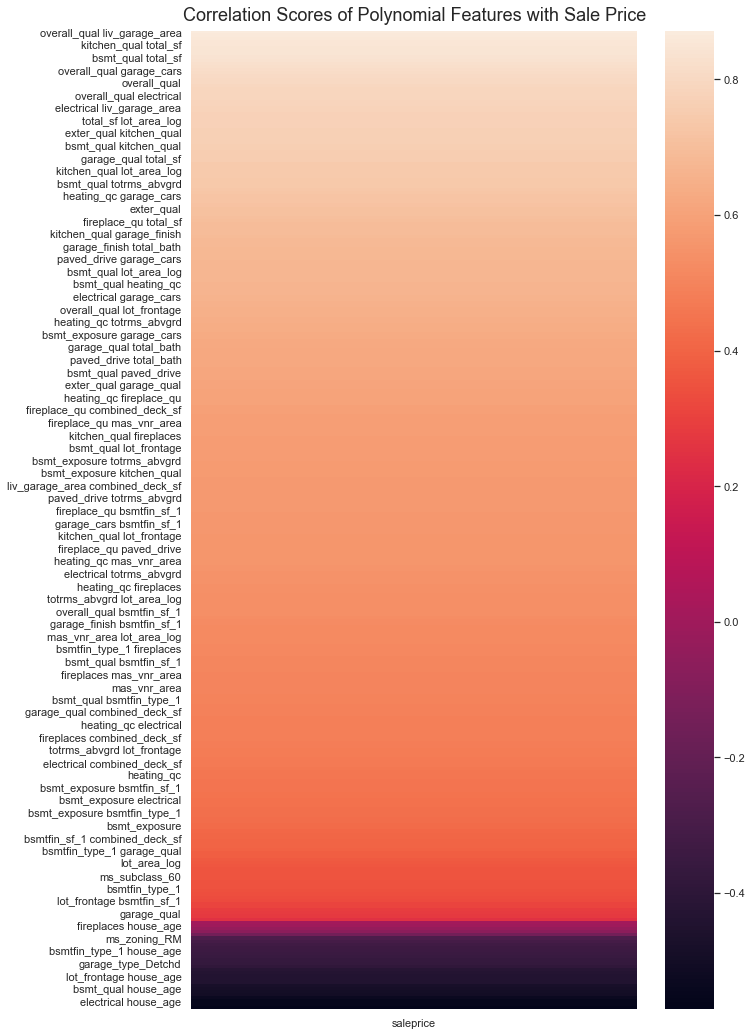

In [134]:
df_poly_corr = df_poly.join(df['saleprice']).corr() #Calculate correlation of df_poly with saleprice.
plt.figure(figsize=(10,18))
sns.heatmap(df_poly_corr[['saleprice']].sort_values(by='saleprice',ascending=False)[1:]);
plt.title('Correlation Scores of Polynomial Features with Sale Price',fontsize=18,pad=10.0);

After polynomializing our selected features, we now have 311 features in total, most of which have relatively high correlation scores to our sale price (understandably, as the original features had more than 0.3 correlation scores). To help us decide how to reduce the number of variables in our model and determine which of our features are the most important, we can leverage on recursive feature elimination.

Before this, let's process and transform our test data in the same way as we have done for our train data.

# 6. Test Data Processing

To conduct the modeling, the test data is processed in the same way as the training dataset.

In [135]:
test_data.columns = [x.lower().replace(' ','_') for x in test_data.columns]

In [136]:
test_data.dtypes

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
                 ...   
misc_feature     object
misc_val          int64
mo_sold           int64
yr_sold           int64
sale_type        object
Length: 80, dtype: object

In [137]:
test_data['ms_subclass'] = test_data['ms_subclass'].astype('str')

### Missing values
We'll need to process any null values in columns that we are using for the model.

In [138]:
var_check = ordinal_selected + discrete_selected + continuous_selected + transformation_variables

In [139]:
test_data[var_check].isnull().sum().sort_values(ascending=False)

fireplace_qu      422
lot_frontage      160
garage_finish      45
garage_qual        45
garage_type        44
bsmt_qual          25
bsmt_exposure      25
bsmtfin_type_1     25
mas_vnr_area        1
electrical          1
mas_vnr_type        1
garage_cars         0
fireplaces          0
screen_porch        0
totrms_abvgrd       0
paved_drive         0
ms_subclass         0
kitchen_qual        0
heating_qc          0
exter_qual          0
bsmtfin_sf_1        0
neighborhood        0
ms_zoning           0
year_built          0
wood_deck_sf        0
garage_area         0
gr_liv_area         0
2nd_flr_sf          0
1st_flr_sf          0
total_bsmt_sf       0
lot_area            0
yr_sold             0
open_porch_sf       0
full_bath           0
bsmt_full_bath      0
sale_type           0
central_air         0
foundation          0
exterior_2nd        0
exterior_1st        0
overall_qual        0
dtype: int64

The null values in the test data set should be filled in with the same principles as those in the training dataset, which are detailed as follows.

_The value counts for the ordinal variables indicate that the null values are likely to be 'NA' values as well._

In [140]:
for x in ['fireplace_qu','garage_qual','garage_cond','garage_finish','garage_type','bsmt_exposure','bsmt_qual','bsmtfin_type_1']: 
    if test_data[x].isnull().sum() > 0:
        print (test_data[x].value_counts(), '\n')

Gd    221
TA    193
Fa     16
Po     15
Ex     12
Name: fireplace_qu, dtype: int64 

TA    783
Fa     42
Gd      6
Po      3
Name: garage_qual, dtype: int64 

TA    797
Fa     27
Po      6
Gd      3
Ex      1
Name: garage_cond, dtype: int64 

Unf    382
RFn    233
Fin    219
Name: garage_finish, dtype: int64 

Attchd     518
Detchd     246
BuiltIn     54
Basment      9
2Types       4
CarPort      4
Name: garage_type, dtype: int64 

No    567
Av    130
Gd     81
Mn     76
Name: bsmt_exposure, dtype: int64 

TA    396
Gd    355
Ex     74
Fa     28
Po      1
Name: bsmt_qual, dtype: int64 

Unf    248
GLQ    244
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: bsmtfin_type_1, dtype: int64 



In [141]:
test_data[['fireplace_qu','garage_qual','garage_cond','garage_finish','garage_type','bsmt_exposure','bsmt_qual','bsmtfin_type_1']] = test_data[['fireplace_qu','garage_qual','garage_cond','garage_finish','garage_type','bsmt_exposure','bsmt_qual','bsmtfin_type_1']].fillna('NA')

_As in the training dataset, we will impute 0.0 into the null value for mas_vnr_area._

In [142]:
test_data['mas_vnr_area'] = test_data['mas_vnr_area'].fillna(0.0)

_For the electrical column, we have no precedent as the training dataset did not have any null values. We will check which category has the most values in both datasets and impute that value instead._

In [143]:
test_data.loc[test_data['electrical'].isnull(),:]

id        pid ms_subclass ms_zoning  lot_frontage  lot_area street  \
635  1578  916386080          80        RL          73.0      9735   Pave   

    alley lot_shape land_contour  ... 3ssn_porch screen_porch pool_area  \
635   NaN       Reg          Lvl  ...          0            0         0   

    pool_qc fence misc_feature misc_val mo_sold  yr_sold  sale_type  
635     NaN   NaN          NaN        0       5     2008        WD   

[1 rows x 80 columns]

In [144]:
test_data.electrical.value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [145]:
df.electrical.value_counts()

5    1867
4     140
3      35
2       7
1       1
Name: electrical, dtype: int64

In [146]:
test_data['electrical'] = test_data['electrical'].fillna('SBrkr')

_For lot frontage, we can use the same linear regression model as we did for the training dataset._

In [147]:
X_td_lot = test_data[test_data['lot_frontage'].isnull()][['lot_area']]
lot_frontage_test_preds = lot_lr.predict(X_td_lot)
test_data.loc[test_data['lot_frontage'].isnull(),'lot_frontage'] = lot_frontage_test_preds

_For mas_vnr_type, we are only using the None hot-encoded column so we can leave the null value in the dataset._

In [148]:
test_data[var_check].isnull().sum().sort_values(ascending=False)

mas_vnr_type      1
screen_porch      0
garage_qual       0
bsmtfin_sf_1      0
mas_vnr_area      0
lot_frontage      0
garage_cars       0
fireplaces        0
totrms_abvgrd     0
paved_drive       0
garage_finish     0
ms_zoning         0
fireplace_qu      0
kitchen_qual      0
electrical        0
heating_qc        0
bsmtfin_type_1    0
bsmt_exposure     0
bsmt_qual         0
exter_qual        0
ms_subclass       0
neighborhood      0
open_porch_sf     0
year_built        0
wood_deck_sf      0
garage_area       0
gr_liv_area       0
2nd_flr_sf        0
1st_flr_sf        0
total_bsmt_sf     0
lot_area          0
yr_sold           0
exterior_1st      0
full_bath         0
bsmt_full_bath    0
sale_type         0
garage_type       0
central_air       0
foundation        0
exterior_2nd      0
overall_qual      0
dtype: int64

### Data Transformation

Now that the null values have been filled in where needed, we'll need to make the same transformations as we did for our training data.

In [149]:
test_data.head()

id        pid ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  2658  902301120         190        RM     69.000000      9142   Pave  Grvl   
1  2718  905108090          90        RL     69.160621      9662   Pave   NaN   
2  2414  528218130          60        RL     58.000000     17104   Pave   NaN   
3  1989  902207150          30        RM     60.000000      8520   Pave   NaN   
4   625  535105100          20        RL     68.727553      9500   Pave   NaN   

  lot_shape land_contour  ... 3ssn_porch screen_porch pool_area pool_qc fence  \
0       Reg          Lvl  ...          0            0         0     NaN   NaN   
1       IR1          Lvl  ...          0            0         0     NaN   NaN   
2       IR1          Lvl  ...          0            0         0     NaN   NaN   
3       Reg          Lvl  ...          0            0         0     NaN   NaN   
4       IR1          Lvl  ...          0          185         0     NaN   NaN   

  misc_feature misc_val mo_sold  yr_sold  sale_type  
0          NaN        0       4     2006        WD   
1          NaN        0       8     2006        WD   
2          NaN        0       9     2006        New  
3          NaN        0       7     2007        WD   
4          NaN        0       7     2009        WD   

[5 rows x 80 columns]

We create one-hot encoded columns for all of the variables in the shortlisted nominal variables.

In [150]:
for var in nominal_shortlisted:
    dummy_td = pd.get_dummies(test_data[var],prefix=var)
    test_data = test_data.join(dummy_td)

We map the ordinal categories for test data as we did for the train dataset.

In [151]:
test_data['lot_shape'] = test_data['lot_shape'].map({'IR3':1,'IR2':2,'IR1':3,'Reg':4})
test_data['utilities'] = test_data['utilities'].map({'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4})
test_data['land_slope'] = test_data['land_slope'].map({'Sev':1,'Mod':2,'Gtl':3})
test_data['exter_qual'] = test_data['exter_qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['exter_cond'] = test_data['exter_cond'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['bsmt_qual'] = test_data['bsmt_qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['bsmt_cond'] = test_data['bsmt_cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['bsmt_exposure'] = test_data['bsmt_exposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
test_data['bsmtfin_type_1'] = test_data['bsmtfin_type_1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
test_data['bsmtfin_type_2'] = test_data['bsmtfin_type_2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
test_data['heating_qc'] = test_data['heating_qc'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['electrical'] = test_data['electrical'].map({'Mix':1,'FuseP':2,'FuseF':3,'FuseA':4,'SBrkr':5})
test_data['kitchen_qual'] = test_data['kitchen_qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['functional'] = test_data['functional'].map({'Sal':1,'Sev':2,'Maj2':3,'Maj1':4,'Mod':5,'Min2':6,'Min1':7,'Typ':8})
test_data['fireplace_qu'] = test_data['fireplace_qu'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['garage_finish'] = test_data['garage_finish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
test_data['garage_qual'] = test_data['garage_qual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['garage_cond'] = test_data['garage_cond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
test_data['paved_drive'] = test_data['paved_drive'].map({'N':1,'P':2,'Y':3})
test_data['pool_qc'] = test_data['pool_qc'].map({'NA':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
test_data['fence'] = test_data['fence'].map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})

We create new features to be used in the model, as we did in the train dataset.

In [152]:
test_data['lot_area_log'] = np.log10(test_data['lot_area'])
test_data['house_age'] = test_data['yr_sold'] - test_data['year_built']
test_data['total_sf'] = test_data['total_bsmt_sf'] + test_data['1st_flr_sf'] + test_data['2nd_flr_sf']
test_data['liv_garage_area'] = test_data['gr_liv_area']+test_data['garage_area']
test_data['total_bath'] = test_data['bsmt_full_bath'] + test_data['full_bath']
test_data['combined_deck_sf'] = test_data['wood_deck_sf']+test_data['open_porch_sf']+test_data['screen_porch']

Lastly, we'll need to polynomialize our features in the test data set as well.

In [153]:
#Polynomialize
poly_test = PolynomialFeatures(2,include_bias=False)
columns = test_data[features_to_poly].columns.tolist()
td_poly = poly_test.fit_transform(test_data[features_to_poly])
td_poly = pd.DataFrame(td_poly, columns = poly_test.get_feature_names(columns)) 

In [154]:
td_poly.head()

overall_qual  exter_qual  bsmt_qual  bsmt_exposure  bsmtfin_type_1  \
0           6.0         3.0        2.0            1.0             1.0   
1           5.0         3.0        4.0            1.0             1.0   
2           7.0         4.0        4.0            3.0             6.0   
3           5.0         4.0        3.0            1.0             1.0   
4           6.0         3.0        4.0            1.0             4.0   

   heating_qc  electrical  kitchen_qual  fireplace_qu  garage_finish  ...  \
0         4.0         2.0           2.0           0.0            1.0  ...   
1         3.0         5.0           3.0           0.0            3.0  ...   
2         5.0         5.0           4.0           4.0            2.0  ...   
3         3.0         5.0           3.0           0.0            1.0  ...   
4         4.0         5.0           3.0           4.0            2.0  ...   

   liv_garage_area^2  liv_garage_area total_sf  liv_garage_area lot_area_log  \
0          5607424.0                 6980864.0                   9379.745602   
1          6487209.0                10019898.0                  10149.965733   
2          3694084.0                 4132300.0                   8136.013756   
3          2096704.0                 2803328.0                   5691.276533   
4          3640464.0                 5319504.0                   7589.496639   

   liv_garage_area combined_deck_sf  total_sf^2  total_sf lot_area_log  \
0                          142080.0   8690704.0           11677.149508   
1                          432990.0  15476356.0           15677.253708   
2                          238328.0   4622500.0            9101.160029   
3                               0.0   3748096.0            7609.331055   
4                          497988.0   7772944.0           11089.893412   

   total_sf combined_deck_sf  lot_area_log^2  lot_area_log combined_deck_sf  \
0                   176880.0       15.689848                     237.662473   
1                   668780.0       15.880759                     677.461396   
2                   266600.0       17.919116                     524.904113   
3                        0.0       15.448355                       0.000000   
4                   727668.0       15.822285                    1038.185861   

   combined_deck_sf^2  
0              3600.0  
1             28900.0  
2             15376.0  
3                 0.0  
4             68121.0  

[5 rows x 324 columns]

In [155]:
td_poly = td_poly.join(test_data[nominal_selected])

Our test data set has now been transformed in the same way as the train dataset and we can generate predictions for any of our models.

# 7. Model Iteration

To reduce the number of features, we can leverage on both RFE and lasso regression. We'll conduct both and evaluate which one is more successful at reducing the number of features.

### Recursive feature elimination

In [156]:
#Create X and y based on all polynomial variables.
X_poly = df_poly
y = df['saleprice']

#Split and scale our data for modeling.
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly ,y, random_state=42,test_size=0.3)
ss = StandardScaler()
X_poly_train_scaled = ss.fit_transform(X_poly_train)
X_poly_test_scaled = ss.transform(X_poly_test)

In [157]:
poly_filter = pd.DataFrame(index=df_poly.columns.tolist())#Create dataframe to store information about RFE ranking.
poly_filter.head()

Empty DataFrame
Columns: []
Index: [overall_qual, exter_qual, bsmt_qual, bsmt_exposure, bsmtfin_type_1]

In [158]:
model = LinearRegression() #Instantiate linear regression model for RFE

rfe = RFE(model, n_features_to_select=30)#Initialize RFE model

X_rfe = rfe.fit_transform(X_poly_train_scaled ,y_poly_train) #Fit and transform data using RFE

poly_filter['rfesupport'] = rfe.support_ #Add RFE support values to dataframe
poly_filter['rferank'] = rfe.ranking_ #Add RFE ranks to dataframe

rfe_vars = poly_filter.loc[poly_filter['rferank'] == 1,:].index.tolist() #Create list of variables shortlisted by RFE

In [159]:
poly_filter.sort_values(by='rferank').head(30)

rfesupport  rferank
overall_qual mas_vnr_area            True        1
total_bath liv_garage_area           True        1
kitchen_qual garage_cars             True        1
garage_finish garage_qual            True        1
garage_qual garage_cars              True        1
garage_qual mas_vnr_area             True        1
paved_drive mas_vnr_area             True        1
combined_deck_sf                     True        1
liv_garage_area total_sf             True        1
total_sf                             True        1
overall_qual total_bath              True        1
bsmtfin_sf_1                         True        1
total_sf lot_area_log                True        1
exter_qual bsmtfin_type_1            True        1
fireplaces lot_area_log              True        1
fireplaces                           True        1
lot_area_log combined_deck_sf        True        1
bsmt_qual kitchen_qual               True        1
totrms_abvgrd mas_vnr_area           True        1
bsmtfin_type_1                       True        1
total_sf combined_deck_sf            True        1
bsmtfin_sf_1 total_sf                True        1
garage_cars                          True        1
bsmt_qual total_sf                   True        1
garage_finish                        True        1
overall_qual total_sf                True        1
exter_qual bsmtfin_sf_1              True        1
exter_qual mas_vnr_area              True        1
mas_vnr_area liv_garage_area         True        1
kitchen_qual total_sf                True        1

Now that we have a list of shortlisted variables by RFE, we can proceed to model based on these variables and evaluate the performance of these models.

In [160]:
X_rfe = df_poly[rfe_vars] # Create X based on shortlisted RFE vars

#Split and transform X_rfe
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)
ss_rfe = StandardScaler()
X_rfe_train_scaled = ss_rfe.fit_transform(X_rfe_train)
X_rfe_test_scaled = ss_rfe.transform(X_rfe_test)

In [161]:
#Create linear model based on RFE variables
linear_rfe = view_linear_model(X_rfe,X_rfe_train_scaled, X_rfe_test_scaled, 
                               y_rfe_train, y_rfe_test, 'RFE-linear shortlisted')

CV R^2                  =  0.89440737564374
CV SqrtMSE              =  24895.931536950284

Performance on Train Data
Mean squared error      =  535039546.98709303
Root mean squared error =  23130.921879317586
Median absolute error   =  11569.370815474424
R^2                     =  0.9125830850994248
Adjusted R^2            =  0.9107152023024039

Performance on Test Data
Mean squared error      =  688113905.8840812
Root mean squared error =  26231.925317903777
Median absolute error   =  11501.216964579085
R^2                     =  0.89628500231729
Adjusted R^2            =  0.8909571770938631


In [162]:
#Create lasso model based on RFE variables. 
#A relatively low alpha range is selected as we do not need to reduce the number of features further

lasso_rfe = view_lassoCV_model(X_rfe,X_rfe_train_scaled, X_rfe_test_scaled, 
                               y_rfe_train, y_rfe_test,np.arange(0.01,0.5,0.05),100000,'RFE-linear shortlisted')


Lasso Alpha             =  0.01
Variables with coefs >0 =  15

CV R^2                  =  0.8944071798803688
CV SqrtMSE              =  24895.98350704925

Performance on Train Data
Mean squared error      =  535039547.74350774
Root mean squared error =  23130.92189566831
Median absolute error   =  11569.538886265567
R^2                     =  0.9125830849758386
Adjusted R^2            =  0.9107152021761771

Performance on Test Data
0.8962870177817251
Mean squared error      =  688100533.9597154
Root mean squared error =  26231.670437845078
Median absolute error   =  11500.049224983915
R^2                     =  0.8962870177817251
Adjusted R^2            =  0.8909592960924302


In [163]:
#Create ridge model based on RFE variables. 

ridge_rfe = view_ridgeCV_model(X_rfe,X_rfe_train_scaled, X_rfe_test_scaled, 
                               y_rfe_train, y_rfe_test,np.arange(0.1,10,0.5),'RFE-linear shortlisted')


Ridge Alpha             =  0.1
CV R^2                  =  0.8945240651220437
CV SqrtMSE              =  24890.99547512152

Performance on Train Data
Mean squared error      =  535074734.8958872
Root mean squared error =  23131.68249167983
Median absolute error   =  11591.981971500558
R^2                     =  0.9125773359572428
Adjusted R^2            =  0.9107093303153035

Performance on Test Data
Mean squared error      =  685529447.8619151
Root mean squared error =  26182.61728441057
Median absolute error   =  11449.365369307692
R^2                     =  0.8966745411065631
Adjusted R^2            =  0.8913667264373797


In [164]:
#Create elastic net model based on RFE variables. 
#l1 ratio is lower as we do not really need lasso in the model

enet_alphas = np.arange(0.01, 0.1, 0.005)
enet_rfe = view_enet_model(X_rfe,X_rfe_train_scaled, X_rfe_test_scaled, 
                           y_rfe_train, y_rfe_test, 0.05,enet_alphas,100000,'RFE-linear shortlisted')

Elastic Net Alpha       =  0.01
CV R^2                  =  0.8833751047403403
CV SqrtMSE              =  26519.562107805075

Performance on Train Data
Mean squared error      =  604339287.7046078
Root mean squared error =  24583.313196243664
Median absolute error   =  12142.332648665179
R^2                     =  0.9012606145062724
Adjusted R^2            =  0.8991507985769192

Performance on Test Data
Mean squared error      =  657457498.0462401
Root mean squared error =  25640.934032250854
Median absolute error   =  12468.451615048834
R^2                     =  0.9009056461390086
Adjusted R^2            =  0.8958151827557385


In [165]:
model_tracker = model_tracker.append([linear_rfe, lasso_rfe, ridge_rfe, enet_rfe],ignore_index=True)

In [166]:
model_tracker

Method                    Desc Alpha Variable Count CV R^2 Score  CV RMSE  \
0    Mean                Baseline    NA             35           NA       NA   
1  Linear                   Basic    NA             35     0.808115  33758.3   
2  Linear                   Basic    NA             35     0.808115  33758.3   
3  Linear  RFE-linear shortlisted    NA             30     0.894407  24895.9   
4   Lasso  RFE-linear shortlisted  0.01             30     0.894407    24896   
5   Ridge  RFE-linear shortlisted   0.1             30     0.894524    24891   
6    Enet  RFE-linear shortlisted  0.01             30     0.883375  26519.6   

   Train R^2 Score  Train Adj R^2 Score    Train RMSE  Test R^2 Score  \
0        -0.000249            -0.025273  78243.681604       -0.001251   
1         0.842747             0.838813  31023.799617        0.868100   
2         0.842747             0.838813  31023.799617        0.868100   
3         0.912583             0.910715  23130.921879        0.896285   
4         0.912583             0.910715  23130.921896        0.896287   
5         0.912577             0.910709  23131.682492        0.896675   
6         0.901261             0.899151  24583.313196        0.900906   

   Test Adj R^2 Score     Test RMSE  
0           -0.061776  81504.358803  
1            0.860127  29582.272533  
2            0.860127  29582.272533  
3            0.890957  26231.925318  
4            0.890959  26231.670438  
5            0.891367  26182.617284  
6            0.895815  25640.934032

### Lasso Filtering

In order to use lasso to filter out our features, we will need to use a very large alpha in order to increase the penalty and force more of the coefficients to zero. Repeated testing shows us that the ideal alpha for this is 1235.

In [167]:
l_alphas = np.arange(1235,1240, 0.5)
lasso_filter = view_lassoCV_model(X_poly, X_poly_train_scaled, X_poly_test_scaled, y_poly_train, y_poly_test,l_alphas,10000,'All poly')

Lasso Alpha             =  1235.0
Variables with coefs >0 =  30

CV R^2                  =  0.8337833115661173
CV SqrtMSE              =  31516.022885604674

Performance on Train Data
Mean squared error      =  602879936.9276086
Root mean squared error =  24553.61352077548
Median absolute error   =  11575.137604374759
R^2                     =  0.9014990491105953
Adjusted R^2            =  0.8742205132899321

Performance on Test Data
0.9053106093400773
Mean squared error      =  628232058.1263934
Root mean squared error =  25064.557808315578
Median absolute error   =  12250.979016079218
R^2                     =  0.9053106093400773
Adjusted R^2            =  0.808121168761741


We can add the details of the lasso coefficients to the poly_filter dataframe as well.

In [168]:
lasso_reduce = Lasso(alpha=1235, max_iter=10000) #Instantiate lasso with alpha
lasso_reduce.fit(X_poly_train_scaled,y_poly_train) #Fit lasso to data

Lasso(alpha=1235, max_iter=10000)

In [169]:
poly_filter['lasso_coefs'] = lasso_reduce.coef_.tolist()

In [170]:
poly_filter.loc[poly_filter['lasso_coefs']>0,:]

rfesupport  rferank   lasso_coefs
lot_area_log                       False      116   6960.455559
overall_qual exter_qual            False       13  12646.578206
overall_qual totrms_abvgrd         False      146   4528.138757
overall_qual total_bath             True        1   3160.167519
overall_qual liv_garage_area       False      130  10513.463155
exter_qual lot_area_log            False       40    378.985353
bsmt_qual bsmtfin_sf_1             False      159  13079.845766
bsmt_qual total_sf                  True        1   2601.249307
bsmt_exposure fireplace_qu         False      202   6465.216235
bsmt_exposure total_bath           False      200   1562.037458
bsmtfin_type_1 bsmtfin_sf_1        False      167   4884.949394
bsmtfin_type_1 total_sf            False      136   1312.942624
heating_qc bsmtfin_sf_1            False      140     43.098573
heating_qc total_sf                False       88   6079.722604
kitchen_qual liv_garage_area       False      255  10060.284764
kitchen_qual total_sf               True        1   6977.931138
fireplace_qu bsmtfin_sf_1          False      232    861.950492
garage_finish mas_vnr_area         False      237    295.045778
garage_qual bsmtfin_sf_1           False      183   1951.619618
garage_qual total_sf               False      143    955.165709
garage_qual combined_deck_sf       False      221   1753.830287
paved_drive lot_area_log           False      243   1696.803527
fireplaces garage_cars             False       18   2914.382838
garage_cars mas_vnr_area           False       14   3351.374232
garage_cars bsmtfin_sf_1           False      160   4677.482279
mas_vnr_area total_bath            False       54    944.106492
total_bath combined_deck_sf        False      111   3749.825794
neighborhood_NridgHt               False      250   2031.475589
central_air_Y                      False      265    326.934081
sale_type_New                      False      154   3918.529648

From the table, it looks like many of the features selected by lasso were not picked up by RFE and vice versa.

Similarly to the RFE shortlisted variables, we will create X based on the lasso shortlisted variables and generate models against the data to test the result.

In [171]:
lasso_shortlisted = poly_filter.loc[poly_filter['lasso_coefs'] > 0, :].sort_values(by='lasso_coefs').index.tolist()

In [172]:
len(lasso_shortlisted)

30

In [173]:
X_lasso_sl = df_poly[lasso_shortlisted]
X_lasso_sl_train, X_lasso_sl_test, y_lasso_sl_train, y_lasso_sl_test = train_test_split(X_lasso_sl,y,random_state=42,test_size=0.3)
ss_lasso_sl = StandardScaler()
X_lasso_sl_train_scaled = ss_lasso_sl.fit_transform(X_lasso_sl_train)
X_lasso_sl_test_scaled = ss_lasso_sl.transform(X_lasso_sl_test)

In [174]:
#Create linear model based on lasso shortlisted variables. 

linear_ls = view_linear_model(X_lasso_sl,X_lasso_sl_train_scaled, X_lasso_sl_test_scaled, 
                              y_lasso_sl_train, y_lasso_sl_test, 'Lasso shortlisted vars')


CV R^2                  =  0.8133396862938861
CV SqrtMSE              =  33142.30261622839

Performance on Train Data
Mean squared error      =  851913371.8829024
Root mean squared error =  29187.555085736494
Median absolute error   =  13292.48604664189
R^2                     =  0.8608109640644072
Adjusted R^2            =  0.8578368393649286

Performance on Test Data
Mean squared error      =  801265053.399444
Root mean squared error =  28306.625609553746
Median absolute error   =  13288.415308834898
R^2                     =  0.8792304552401252
Adjusted R^2            =  0.8730265402695837


In [175]:
#Create lasso model based on lasso shortlisted variables. 
#Alpha range is relatively low as we do not really need lasso in the model

l_alphas = np.arange(0.01,0.5,0.05)
lasso_ls = view_lassoCV_model(X_lasso_sl,X_lasso_sl_train_scaled, X_lasso_sl_test_scaled, 
                              y_lasso_sl_train, y_lasso_sl_test,l_alphas,100000, 'Lasso shortlisted vars')


Lasso Alpha             =  0.46
Variables with coefs >0 =  21

CV R^2                  =  0.8133419247665034
CV SqrtMSE              =  33142.11647444954

Performance on Train Data
Mean squared error      =  851913561.6434802
Root mean squared error =  29187.558336446717
Median absolute error   =  13301.314067572821
R^2                     =  0.86081093306056
Adjusted R^2            =  0.8578368076986063

Performance on Test Data
0.8792540213636427
Mean squared error      =  801108700.1461784
Root mean squared error =  28303.863696431596
Median absolute error   =  13312.770425853902
R^2                     =  0.8792540213636427
Adjusted R^2            =  0.8730513169816381


In [176]:
#Create ridge model based on lasso shortlisted variables. 

r_alphas = np.arange(0.1,10,0.5)
ridge_ls = view_ridgeCV_model(X_lasso_sl,X_lasso_sl_train_scaled, X_lasso_sl_test_scaled, 
                              y_lasso_sl_train, y_lasso_sl_test,r_alphas, 'Lasso shortlisted vars')



Ridge Alpha             =  9.6
CV R^2                  =  0.8135218808828748
CV SqrtMSE              =  33133.45301353104

Performance on Train Data
Mean squared error      =  860659258.0033535
Root mean squared error =  29336.994699582872
Median absolute error   =  13270.73761782999
R^2                     =  0.8593820259849196
Adjusted R^2            =  0.8563773684204948

Performance on Test Data
Mean squared error      =  775072906.7728394
Root mean squared error =  27840.1312276512
Median absolute error   =  13267.341976532654
R^2                     =  0.8831782295888987
Adjusted R^2            =  0.8771771112458626


In [177]:
#Create elastic net model based on lasso shortlisted variables. 
#l1 ratio is relatively low as we do not really need lasso in the model

enet_alphas = np.arange(0.01, 0.1, 0.005)
enet_ls = view_enet_model(X_lasso_sl,X_lasso_sl_train_scaled, X_lasso_sl_test_scaled, y_lasso_sl_train, y_lasso_sl_test,0.05,enet_alphas,100000,'Lasso shortlisted vars')

Elastic Net Alpha       =  0.09499999999999999
CV R^2                  =  0.8170690839516856
CV SqrtMSE              =  32892.599824280864

Performance on Train Data
Mean squared error      =  908097356.7899866
Root mean squared error =  30134.65375261489
Median absolute error   =  12319.420263323904
R^2                     =  0.8516313984508839
Adjusted R^2            =  0.8484611291870139

Performance on Test Data
Mean squared error      =  742360068.3209071
Root mean squared error =  27246.28540408595
Median absolute error   =  12875.811410201743
R^2                     =  0.888108826013742
Adjusted R^2            =  0.882360991733626


In [178]:
model_tracker = model_tracker.append([linear_ls, lasso_ls, ridge_ls, enet_ls])

In [179]:
model_tracker.reset_index(drop=True)

Method                    Desc  Alpha Variable Count CV R^2 Score  \
0     Mean                Baseline     NA             35           NA   
1   Linear                   Basic     NA             35     0.808115   
2   Linear                   Basic     NA             35     0.808115   
3   Linear  RFE-linear shortlisted     NA             30     0.894407   
4    Lasso  RFE-linear shortlisted   0.01             30     0.894407   
5    Ridge  RFE-linear shortlisted    0.1             30     0.894524   
6     Enet  RFE-linear shortlisted   0.01             30     0.883375   
7   Linear  Lasso shortlisted vars     NA             30      0.81334   
8    Lasso  Lasso shortlisted vars   0.46             30     0.813342   
9    Ridge  Lasso shortlisted vars    9.6             30     0.813522   
10    Enet  Lasso shortlisted vars  0.095             30     0.817069   

    CV RMSE  Train R^2 Score  Train Adj R^2 Score    Train RMSE  \
0        NA        -0.000249            -0.025273  78243.681604   
1   33758.3         0.842747             0.838813  31023.799617   
2   33758.3         0.842747             0.838813  31023.799617   
3   24895.9         0.912583             0.910715  23130.921879   
4     24896         0.912583             0.910715  23130.921896   
5     24891         0.912577             0.910709  23131.682492   
6   26519.6         0.901261             0.899151  24583.313196   
7   33142.3         0.860811             0.857837  29187.555086   
8   33142.1         0.860811             0.857837  29187.558336   
9   33133.5         0.859382             0.856377  29336.994700   
10  32892.6         0.851631             0.848461  30134.653753   

    Test R^2 Score  Test Adj R^2 Score     Test RMSE  
0        -0.001251           -0.061776  81504.358803  
1         0.868100            0.860127  29582.272533  
2         0.868100            0.860127  29582.272533  
3         0.896285            0.890957  26231.925318  
4         0.896287            0.890959  26231.670438  
5         0.896675            0.891367  26182.617284  
6         0.900906            0.895815  25640.934032  
7         0.879230            0.873027  28306.625610  
8         0.879254            0.873051  28303.863696  
9         0.883178            0.877177  27840.131228  
10        0.888109            0.882361  27246.285404

Of the models built with the RFE shortlisted variables, the metrics are comparable to one another, but it appears that the linear, ridge and lasso models tend to be slightly more overfit as the train and test RMSEs have a larger difference compared to the elastic net model. However, the elastic net model also has the highest cross validation RMSE and slightly lower CV R^2 score.

As the ridge model has the lowest CV RMSE, we can use that as our predictor, but we can also use the elastic net model that seems to have less overfit and compare the results between the two models.

Of the models built with the lasso shortlisted variables, the results are also quite similar, although here we see that the ridge and elastic net models seem to have a higher level of overfit, though the ridge model still has the lowest RMSE. However, it is clear that the models built on the RFE shortlisted variables perform better compared to the ones built on the lasso shortlisted variables.

In [180]:
X_rfe = df_poly[rfe_vars]
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

ss_rfe = StandardScaler()
X_rfe_train_scaled = ss_rfe.fit_transform(X_rfe_train)
X_rfe_test_scaled = ss_rfe.transform(X_rfe_test)

In [181]:
ridge_predict = Ridge(alpha=0.1)

In [182]:
ridge_predict.fit(X_rfe_train_scaled,y_rfe_train)
print(ridge_predict.score(X_rfe_train_scaled,y_rfe_train))
print(ridge_predict.score(X_rfe_test_scaled,y_rfe_test))

0.9125773359572428
0.8966745411065631


In [183]:
enet_predict = ElasticNet(l1_ratio=0.05,alpha=0.01,max_iter=10000)

In [184]:
enet_predict.fit(X_rfe_train_scaled,y_rfe_train)
print(enet_predict.score(X_rfe_train_scaled,y_rfe_train))
print(enet_predict.score(X_rfe_test_scaled,y_rfe_test))

0.9012606145062724
0.9009056461390086


For our final predictions, we want to fit our model onto all of our training data so that our model has more data to learn from.

In [185]:
X_final = df_poly[rfe_vars]

ss_final = StandardScaler()
X_final_scaled = ss_final.fit_transform(X_final)

In [186]:
ridge_predict.fit(X_final_scaled,y)

Ridge(alpha=0.1)

In [187]:
enet_predict.fit(X_final_scaled,y)

ElasticNet(alpha=0.01, l1_ratio=0.05, max_iter=10000)

# 8. Test Data Prediction & Output

To predict our test data, we need to create the corresponding X.

In [188]:
#Create X_test based on rfe_vars
X_finalpredict = td_poly[rfe_vars]

In [189]:
#Transform the output with the same transformer.
X_finalpredict_scaled = ss_final.transform(X_finalpredict)

_Ridge Predictions_

In [190]:
#Generate predictions based on ridge
saleprice_ridge_predict = ridge_predict.predict(X_finalpredict_scaled)

In [191]:
#Create dataframe to store our predictions in the submission format
output_ridge = pd.DataFrame()
output_ridge['Id'] = test_data['id']
output_ridge['SalePrice'] = saleprice_ridge_predict

In [192]:
#Save our dataframe as a csv.
output_ridge.to_csv('../datasets/submission_27aug_rfesl_ridge.csv',index=False)

![submission](submission_ridge.png)

The ridge model gives us a private and public score of 30,027 and 28,062 respectively, which is relatively better compared to the baseline model's score around 80,000.

_Elastic Net Predictions_

In [193]:
#Generate predictions based on enet
saleprice_enet_predict = enet_predict.predict(X_finalpredict_scaled)

#Create dataframe to store our predictions in the submission format
output_enet = pd.DataFrame()
output_enet['Id'] = test_data['id']
output_enet['SalePrice'] = saleprice_enet_predict

#Save our dataframe as a csv.
output_enet.to_csv('../datasets/submission_27aug_rfesl_enet.csv',index=False)

![submission](submission_enet.png)

The elastic net model gives us a private and public score of 30,048 and 29,172 respectively, which is just slightly higher compared to the ridge model. Since the l1 ratio is relatively low at 0.05, most of the regularization follows the ridge model, so it makes sense that the two models are similar.

Since the ridge model has a marginally better performance, we'll select it as our final model. We will want to understand better the error and coefficients generated by our model.

### Model Evaluation

Since we do not have access to the sale prices of the actual Kaggle test dataset, we want to fit our model back onto the training dataset and evaluate it on test data that we created.

In [194]:
#Fit back onto X_train that we created:
ridge_predict.fit(X_rfe_train_scaled,y_rfe_train)

Ridge(alpha=0.1)

In [195]:
#Generate predictions for test data
test_pred = ridge_predict.predict(X_rfe_test_scaled)

#Calculate residuals for test data
residuals = y_rfe_test - test_pred

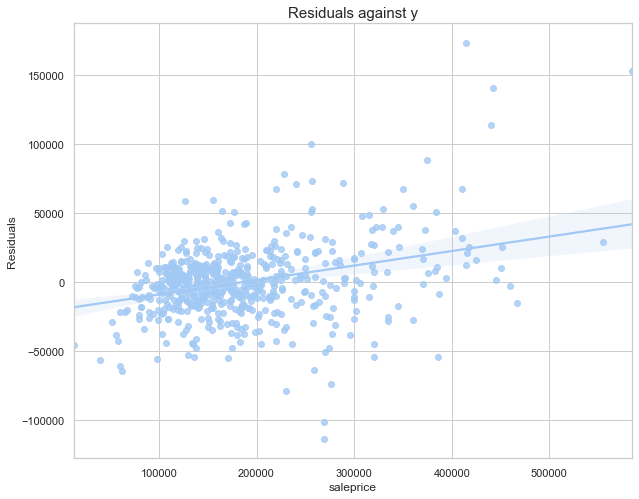

In [196]:
plt.figure(figsize=(10,8))
plt.title('Residuals against y',fontsize=15);
sns.regplot(y_rfe_test, residuals);
plt.ylabel('Residuals');

It looks like as sale price increases, we tend to get a higher range of error. This indicates that the model may not be as useful for predicting sale price beyond a certain number, where other factors not available in the dataset may be affecting the target.

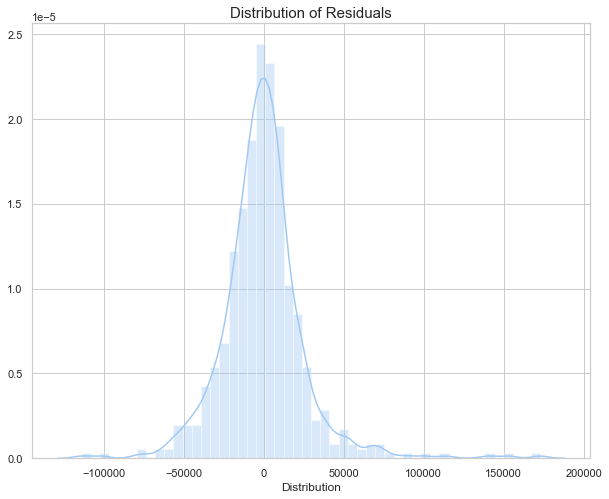

In [197]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Residuals',fontsize=15)
sns.distplot(residuals);
plt.xlabel('Distribution');

However, the residuals are approximately normally distributed, indicating that to a certain degree, we can generate inferences from our model.

In [198]:
#Fit ridge back onto full dataset.
ridge_predict.fit(X_final_scaled,y)

Ridge(alpha=0.1)

In [199]:
ridge_coefs = pd.DataFrame(index=rfe_vars)
ridge_coefs['ridge_coefs'] = abs(ridge_predict.coef_)

In [200]:
ridge_coefs = ridge_coefs.sort_values(by='ridge_coefs',ascending=False) 
#Sort by ridge_coefs so we can plot based on descending coefficients

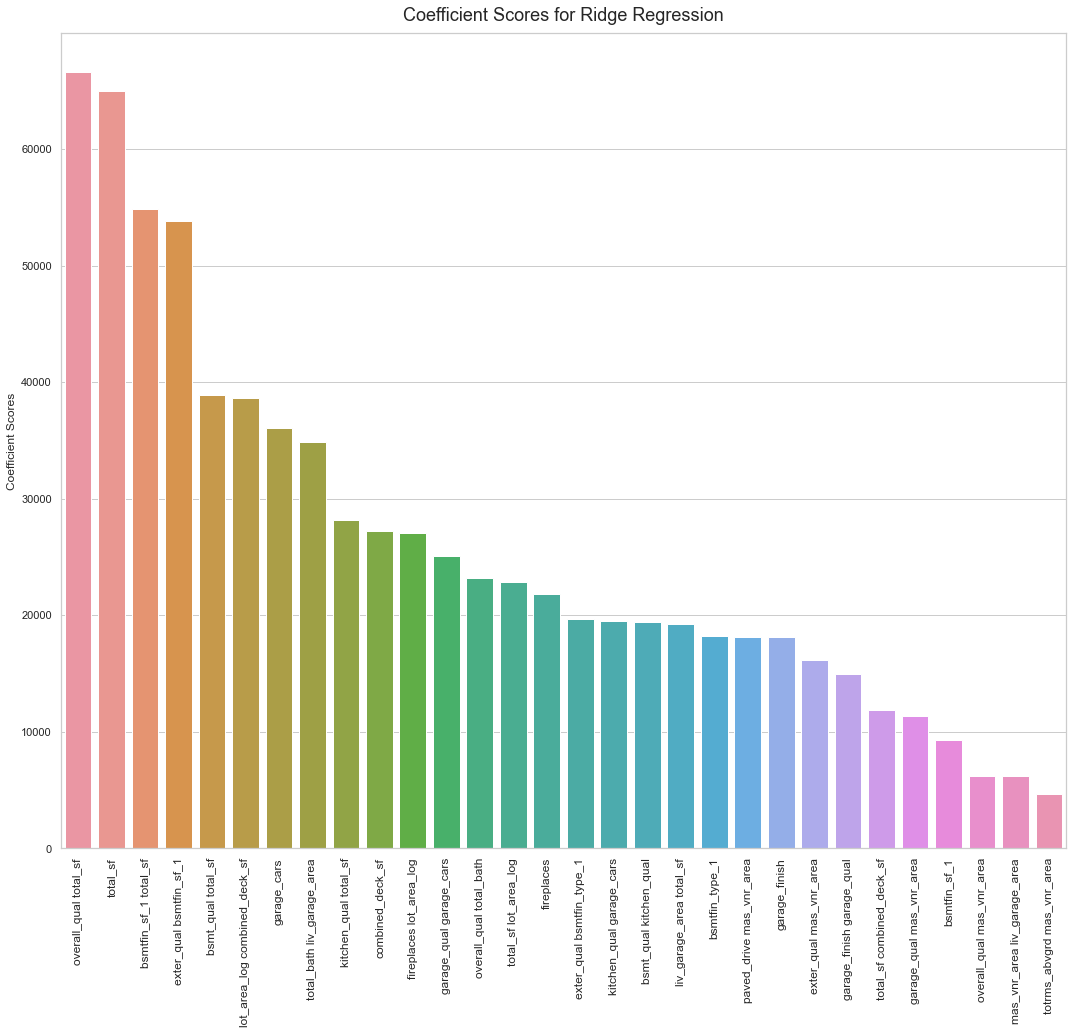

In [201]:
fig, ax = plt.subplots(figsize=(18,15))

sns.barplot(ax = ax, x = list(range(0, len(rfe_vars))),y=ridge_coefs['ridge_coefs'],orient='v');
ax.set_title('Coefficient Scores for Ridge Regression',fontsize=18,pad=12.0);
ax.set_ylabel('Coefficient Scores')
ax.set_xticks(list(range(len(rfe_vars))));
ax.set_xticklabels(ridge_coefs.index, rotation=90, fontsize=12);

We can see that the features with the top 3 highest coefficient scores are all features based on total_sf. This feature continues to show up in the other coefficients, and is in 50% of our top 10 features. Interestingly, this variable was created from other square-foot values in the dataset, which shows us the importance of feature engineering.

In [202]:
top = ridge_coefs.index[:10]

In [203]:
X_top = df_poly[top]

X_top_train, X_top_test, y_top_train, y_top_test = train_test_split(X_top, y, random_state=42, test_size=0.3)

ss_top = StandardScaler()
X_top_train_scaled = ss_top.fit_transform(X_top_train)
X_top_test_scaled = ss_top.fit_transform(X_top_test)


view_linear_model(X_top, X_top_train_scaled,X_top_test_scaled, y_top_train, y_top_test,'top3')

CV R^2                  =  0.8660267076789795
CV SqrtMSE              =  28292.804097693865

Performance on Train Data
Mean squared error      =  714675634.3184507
Root mean squared error =  26733.41793184049
Median absolute error   =  13551.179586223065
R^2                     =  0.8832334180556605
Adjusted R^2            =  0.8824134280139165

Performance on Test Data
Mean squared error      =  1177010488.5848746
Root mean squared error =  34307.58645817095
Median absolute error   =  15561.135370526405
R^2                     =  0.8225967546183117
Adjusted R^2            =  0.8196596147941116


{'Method': 'Linear',
 'Desc': 'top3',
 'Alpha': 'NA',
 'Variable Count': 10,
 'CV R^2 Score': 0.8660267076789795,
 'CV RMSE': 28292.804097693865,
 'Train R^2 Score': 0.8832334180556605,
 'Train Adj R^2 Score': 0.8824134280139165,
 'Train RMSE': 26733.41793184049,
 'Test R^2 Score': 0.8225967546183117,
 'Test Adj R^2 Score': 0.8196596147941116,
 'Test RMSE': 34307.58645817095}

Taking the variables with the top 10 coefficients, we can actually build a linear regression model that gives us a test RMSE of 34,000.

Overall, area seems to feature heavily in the selected variables, whether as interacting with other variables such as overall_qual (ordinal) or with other area features as well. Additionally, looking at the top 10 variables, it seems that a wide variety of house features are represented (e.g. garage, basement, kitchen) - which suggests that the sale price depends on a combination of the condition of different areas across the house.

# 9. Conclusion & Recommendations



We have successfully built a model with a relatively good RMSE based on the training dataset provided, and our examination has indicated that while the top influencing factor appears to be area (total square feet of the house and individual areas), variables across different aspects of the house were also picked out by the model to be significant. 

Our final model leverages the following variables:

_Final Model Data Dictionary_

|Feature|Variable type|Description|
|:------|:-------|:-----|
|bsmtfin_type_1|Ordinal|Rating of basement finished area|
|garage_finish|Ordinal|Interior finish of the garage|
|fireplaces|Discrete|Number of fireplaces|
|garage_cars|Discrete|Size of garage in car capacity|
|bsmtfin_sf_1|Continuous|Type 1 finished square feet|
|total_sf|Interaction|Combines 1st floor sf, 2nd floor sf and total bsmt sf |
|combined_deck_sf|Interaction|Combines wood deck sf, open porch sf and screen porch sf |
|overall_qual mas_vnr_area|Interaction|Combines overall qual and mas vnr area |
|overall_qual total_bath|Interaction|Combines overall qual and total bath |
|overall_qual total_sf|Interaction|Combines overall qual and total sf |
|exter_qual bsmtfin_type_1|Interaction|Combines exter qual and total sf |
|exter_qual mas_vnr_area|Interaction | Combines exter_qual mas_vnr_area|I
|exter_qual bsmtfin_sf_1|Interaction | Combines exter_qual bsmtfin_sf_1|
|bsmt_qual kitchen_qual|Interaction | Combines bsmt_qual kitchen_qual|
|bsmt_qual total_sf|Interaction | Combines bsmt_qual total_sf|
|kitchen_qual garage_cars|Interaction | Combines kitchen_qual garage_cars|
|kitchen_qual total_sf|Interaction | Combines kitchen_qual total_sf|
|garage_finish garage_qual|Interaction | Combines garage_finish garage_qual|
|garage_qual garage_cars|Interaction | Combines garage_qual garage_cars|
|garage_qual mas_vnr_area|Interaction | Combines garage_qual mas_vnr_area|
|paved_drive mas_vnr_area|Interaction | Combines paved_drive mas_vnr_area|
|totrms_abvgrd mas_vnr_area|Interaction | Combines totrms_abvgrd mas_vnr_area|
|fireplaces lot_area_log|Interaction | Combines fireplaces lot_area_log|
|mas_vnr_area liv_garage_area|Interaction | Combines mas_vnr_area liv_garage_area|
|bsmtfin_sf_1 total_sf|Interaction | Combines bsmtfin_sf_1 total_sf|
|total_bath liv_garage_area|Interaction | Combines total_bath liv_garage_area|
|liv_garage_area total_sf|Interaction | Combines liv_garage_area total_sf|
|total_sf lot_area_log|Interaction | Combines total_sf lot_area_log|
|total_sf combined_deck_sf|Interaction | Combines total_sf combined_deck_sf|
|lot_area_log combined_deck_sf|Interaction | Combines lot_area_log combined_deck_sf|

### Recommendations

Although the model generated was relatively successful, we should also note the following:

- The model is likely to have significant predictive power only within Iowa, Ames given that the city often has a large impact on price and may cause the features to interact in a different way. Hence, the use of the model is limited to one area and perhaps neighboring areas.

- The final model leverages quite a few interaction variables from a dataset that is already extremely comprehensive as it was collected by the Ames Assessor’s Office. It is likely that users looking to predict sale price may not have details on all of the variables in the training dataset, while variables such as overall_qual and overall_cond are subjective. It may be fruitful to explore a simpler model that leverages on more accessible variables (e.g. lot_area, total_sf, basement type) which may give us a higher error, but can be generalised to more use cases.

- While we are able to process null values in the dataset by leveraging on other variables, an ideal scenario would be to reduce the null values at the collection stage. As many of the null values turned out to be Not Applicable or they were supposed to be zero values, there can be more standardisation in the data collection process.

While we see that the model built has limitations, it is also true that the process of putting together the model is informative and a similar process can be conducted for other datasets in other cities or with different variables collected. Our process is as follows:

- Clean and process data 
- Exploratory data analysis
- Feature engineering
- Feature selection (by judgement and RFE and lasso techniques)
- Model iteration and optimisation

The last step should be ongoing if there is a stream of new data. Any model will have its limitations, but with the right set of assumptions and understanding of suitable use cases, we're able to predict meaningfully.